<a href="https://colab.research.google.com/github/NicoSammur/mtig/blob/main/INF3521_Ciencia_de_datos_Predicci%C3%B3n_precio_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabajo Parte 1 - EDA Autos - Análisis exploratorio de datos

**Preguntas a resolver**

---

¿Qué variables (columnas) usted descartaría de la base, considerando el objetivo buscado, y por qué?

TIPO_AVISO: Este valor debe ser independiente y no afecta el precio del automóvil como tal. Aunque es posible que al usar TIPO_AVISO los que estén con “ASISTIDO” pueden ser mas caro. (Hacer análisis)

TIPO_VEHICULO ya que tiene el 99% de sus datos en blanco y la información es similar a TIPO_CATEGORIA

CONDICION: Son más relevantes variables como Kilometraje, Año, que la cantidad de dueños que ha tenido.

VISITAS: se refiere al número de personas que ha visto la publicación de un auto en específico, el número de visitas no afecta el valor final del auto.

MANOS_LIBRES: Con el supuesto de que si el vehículo tiene bluetooth tendrá manos libres

COLOR: La mayoria de las filas tiene "OTROS". No aporta

---

¿Qué filtros aplicaría a la base (para descartar filas), y por qué?

Todas las filas que contengan en blanco las siguientes variables. ANIO, COMBUSTIBLE, VERSION, KILOMETROS, MARCA ya que estas son importantes para calcular el precio del vehiculo

Filas donde el KILOMETROS sean igual a 1 o 10 porque generan ruido en el modelo

Filas donde el PRECIO_NORMAL sea menor o igual a 0 y en que estén sin datos pues el precio no puede ser igual o menor a 0 y debe tener un valor para poder entrenar el modelo.

Filas con PRECIO mayor a 50.000.000

Autos con año menor a 2000

---

¿Qué lógicas de transformación/limpieza aplicaría a la base y por qué?

Para la variable VERSION cambiar números romanos por cardinal
Eliminar guiones y espacios, pasar todo a mayúscula o minúscula
Reemplazar tildes y otros caracteres por caracteres estándar 
Reemplazar palabras conocidas mal escritas como “AUTOMATIC” por “AUTOMATICA
Transformación: 
Pasar todos los datos de variables categóricas a numéricas, por ejemplo, combustible, marca, puertas, TIPO_CATEGORIA, TRANSMISION, VERSION

---

De las variables (campos) de la base resultante, después de los descartes, filtros y transformaciones respectivas, ¿cuáles parecen tener más relación/impacto sobre el precio_normal? ¿Cómo puede saberlo?

Por orden de importancia: ANIO, KILOMETROS, VERSION, COMBUSTIBLE y luego el resto.

---

**DSM**

1.   **Entender el negocio** el problema a resolver: Determinar el valor de un auto en base a un set de datos de la forma mas precisa posible
2.   **Enfoque analitico**   Actualmente se consultan distintos portales o se pide a una persona, generalmente de una concesionaria que entregue un precio al auto. Pro y contra es que esta persona requiere de experencia. Toma mucho tiempo. Es posible usar un set de datos para entrenar a un modelo que pueda predecir el valor de un auto
3.   **Requisitos de datos**   Los datos que se necesitan para responder la pregunta son varios registros de venta de autos que incluya modelo , marca, año, color, kilometrajes y precio de venta de este
4.   **Recolección de datos**   Los datos fueron entregados en un dataset obtenido desde un portal de publicacion de automoviles en un excel
5.   **Entendimiento de los de datos**   Los datos entregados son representativos del problema. Una de las complejidades es la gran cantidad de datos categoricos. Los datos se transformaro a csv para poder utilizar la libreria Pandas
6.   **Preparación de los datos** Que se hizo para limpiar y transformar los datos. Que ocurrio con los datos faltantes. Ingenieria de caracteristicas
7.   **Modelado**. Rain forest?
8.   **Evaluacion**. Resultados de accuracy, Specificity, etc.
9.   **Deployment**. Trabajo en formato .doc y link a collab
10. **Feedback** = Nota ramo

**DSM Etapa 1 a 4**
*   Cargar los datos
*   Contar la cantidad total de filas y columnas
*   Nombres por columna

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
%matplotlib inline 
sns.set(color_codes=True)

# Montar Google Drive. ⚠ Problemas con las carpetas compartidas asi que queda en el home
from google.colab import drive
drive.mount('/content/drive')

# Leer el csv y cargarlo a un dataframe
df = pd.read_csv("/content/drive/My Drive/Data_Autos_Ejemplo.csv")

df.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


,ANIO,COLOR,COMBUSTIBLE,COMUNA,CONDICION,KILOMETROS,MARCA,PRECIO_NORMAL,PUERTAS,REGION,TIPO_AVISO,TIPO_CATEGORIA,TIPO_DIRECCION,TIPO_VEHICULO,TRANSMISION,VERSION,VISITAS,AIRBAG_ACOMP,AIRBAG_CONDUC,AIRBAG_CORTINA,AIRBAG_LAT,AIRBAG_TRAS,ALARMA,CIERRE_AUT_MOV,FRENOS_ABS,ISOFIX,AIRE_ACON,BLUETOOTH,CNTRL_VEL_CRUCERO,GPS,MANOS_LIBRES
0,2011,AMARILLO,BENCINA,PUENTE ALTO,USADO,298000,TOYOTA,10900000.0,4,RM,PARTICULAR,SEDAN,ASISTIDA,NaN,MANUAL,YARIS,7.0,SI,NO,SI,SI,SI,SI,SI,NO,SI,NO,NO,SI,SI,SI
1,2017,OTRO,DIESEL,LINARES,USADO,22000,CITROEN,9650000.0,5 o MAS,VII REGION,PARTICULAR,HATCHBACK,ASISTIDA,NaN,MANUAL,C3,0.0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,SI,SI,SI
2,2013,OTRO,BENCINA,SANTIAGO,USADO,62300,SUBARU,14150000.0,2,RM,PARTICULAR,COUPA,ASISTIDA,NaN,MANUAL,BRZ,67.0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
3,2011,OTRO,BENCINA,SANTIAGO,USADO,95000,SKODA,5650000.0,5 o MAS,RM,PARTICULAR,HATCHBACK,HIDRAULICA,NaN,AUTOMATICA,OCTAVIA,0.0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
4,2013,OTRO,BENCINA,SANTIAGO,USADO,64000,FORD,5900000.0,5 o MAS,RM,PARTICULAR,HATCHBACK,HIDRAULICA,NaN,MANUAL,FIESTA,0.0,SI,SI,SI,SI,SI,SI,SI,NO,SI,NO,SI,SI,SI,SI


**DSM Etapa 5: Entiendimiento de los datos**
*   Identificar columnas
*   Conocer volumen de datos
*   Identificar cantidad de datos y el tipo de estos (categorico, numerico)
*   Descripción estadistica de los *datos*

In [ ]:
print('Nombre columnas',df.columns)
print('Cantidad de Filas y columnas',df.shape)
print('Columnas, nulos y tipo de datos')
df.info()

Nombre columnas Index(['ANIO', 'COLOR', 'COMBUSTIBLE', 'COMUNA', 'CONDICION', 'KILOMETROS',
       'MARCA', 'PRECIO_NORMAL', 'PUERTAS', 'REGION', 'TIPO_AVISO',
       'TIPO_CATEGORIA', 'TIPO_DIRECCION', 'TIPO_VEHICULO', 'TRANSMISION',
       'VERSION', 'VISITAS', 'AIRBAG_ACOMP', 'AIRBAG_CONDUC', 'AIRBAG_CORTINA',
       'AIRBAG_LAT', 'AIRBAG_TRAS', 'ALARMA', 'CIERRE_AUT_MOV', 'FRENOS_ABS',
       'ISOFIX', 'AIRE_ACON', 'BLUETOOTH', 'CNTRL_VEL_CRUCERO', 'GPS',
       'MANOS_LIBRES'],
      dtype='object')
Cantidad de Filas y columnas (16159, 31)
Columnas, nulos y tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16159 entries, 0 to 16158
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANIO               16159 non-null  int64  
 1   COLOR              16117 non-null  object 
 2   COMBUSTIBLE        16151 non-null  object 
 3   COMUNA             16125 non-null  object 
 4   CONDICION      

In [ ]:
# Descripciones estadisticas de los datos numericos
pd.options.display.float_format = "{:.2f}".format
df.describe()

,ANIO,KILOMETROS,PRECIO_NORMAL,VISITAS
count,16159.00,16159.00,16146.00,16117.00
mean,2013.43,79581.91,9957745.00,29.64
std,4.05,189162.46,14309209.03,104.91
min,1938.00,0.00,0.00,0.00
25%,2012.00,36000.00,5900000.00,6.00
50%,2014.00,65800.00,8200000.00,15.00
75%,2016.00,100000.00,11690000.00,33.00
max,2019.00,9999999.00,999999999.00,9718.00


**DSM Etapa 5: Entiendimiento de los datos - Histogramas**

CHEVROLET        1353
HYUNDAI          1338
NISSAN           1106
KIA              1078
PEUGEOT           980
                 ... 
DONGFENG            1
HAIMA               1
BENTLEY             1
DESCONOCIDO         1
MERCEDES-BENZ       1
Name: MARCA, Length: 84, dtype: int64

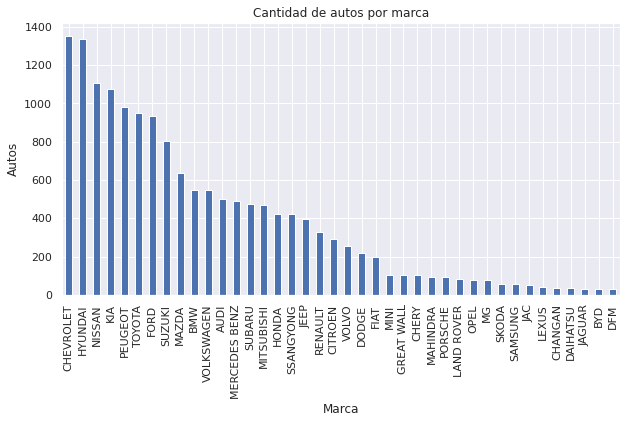

In [ ]:
# Histograma x marca
df.MARCA.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Cantidad de autos por marca')
plt.ylabel('Autos')
plt.xlabel('Marca');
df['MARCA'].value_counts()
######
### Top Marcas
######

SANTA FE     254
RAV-4        250
QASHQAI      243
TUCSON       236
ACCENT       232
            ... 
LIFAN 320      1
J6             1
ES             1
B 200          1
NITRO          1
Name: VERSION, Length: 923, dtype: int64

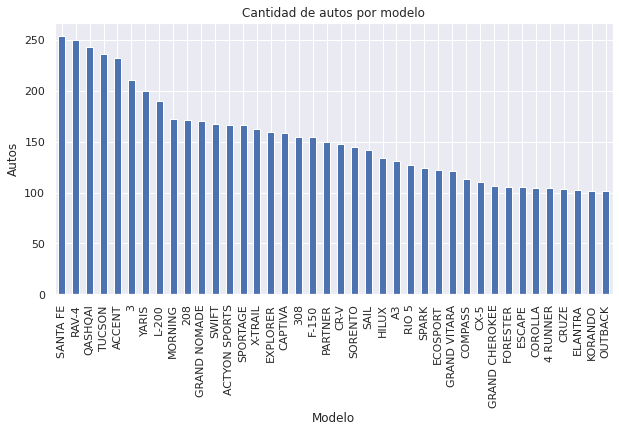

In [ ]:
# Histograma x modelo
df.VERSION.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Cantidad de autos por modelo')
plt.ylabel('Autos')
plt.xlabel('Modelo');
df['VERSION'].value_counts()
######
### Top modelos
######

2016    2168
2014    2161
2015    1961
2017    1939
2013    1911
2012    1411
2011    1031
2018     999
2010     563
2008     433
2009     367
2007     289
2006     198
2019     152
2005     145
2004      98
2003      63
2002      44
1999      31
2001      30
1998      25
2000      24
1996      19
1995      18
1997      13
1993      10
1994       9
1989       8
1992       5
1988       5
1974       3
1982       3
1990       2
1991       2
1983       2
1978       2
1946       2
1985       2
1975       1
1969       1
1951       1
1987       1
1964       1
1938       1
1962       1
1986       1
1981       1
1973       1
1956       1
Name: ANIO, dtype: int64

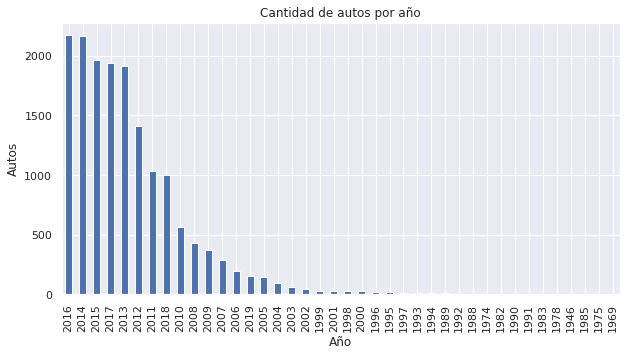

In [ ]:
# Histograma x año
df.ANIO.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Cantidad de autos por año')
plt.ylabel('Autos')
plt.xlabel('Año');
df['ANIO'].value_counts()

BENCINA     12651
DIESEL       3393
GAS            46
HÍBRIDO        29
GASOLINA       28
OTRO            4
Name: COMBUSTIBLE, dtype: int64

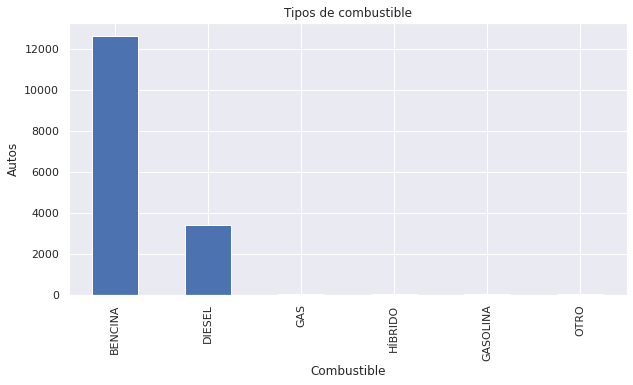

In [ ]:
# Histograma x combustible
df.COMBUSTIBLE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Tipos de combustible')
plt.ylabel('Autos')
plt.xlabel('Combustible');
df['COMBUSTIBLE'].value_counts()
######
### ⚠⚠⚠ En etapa 6, candidato limpieza 
### Dejar solo Bencina y Diesel
######

USADO           6141
PRIMER DUENO     515
Name: CONDICION, dtype: int64

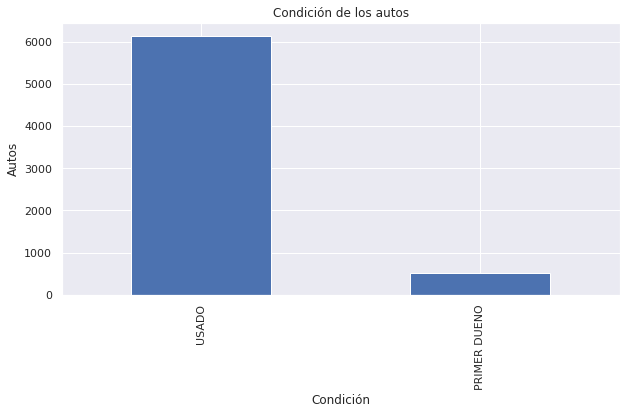

In [ ]:
# Histograma x condición
df.CONDICION.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Condición de los autos')
plt.ylabel('Autos')
plt.xlabel('Condición');
df['CONDICION'].value_counts()
######
### ⚠⚠⚠ En etapa 6, candidato limpieza ya que no aporta nada al entrenamiento del modelo
######

5 o MAS    9598
4          4991
3           807
2           721
Name: PUERTAS, dtype: int64

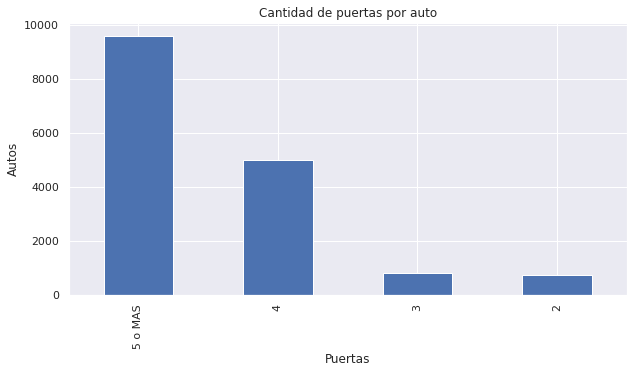

In [ ]:
# Histograma x puertas
df.PUERTAS.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Cantidad de puertas por auto')
plt.ylabel('Autos')
plt.xlabel('Puertas');
df['PUERTAS'].value_counts()
######
### En etapa 6, candidato limpieza ⚠
### Reemplazar "5 O MAS" POR 5 para que sea variable numerica
######

OTRO         9499
BLANCO       2023
GRIS         1599
PLATEADO      852
NEGRO         810
ROJO          650
AZUL          368
BEIGE          99
VERDE          79
AMARILLO       52
NARANJA        20
BORDO          19
BRONCE         16
CELESTE        13
MARRÓN         11
CHAMPAGNE       6
OCRE            1
Name: COLOR, dtype: int64

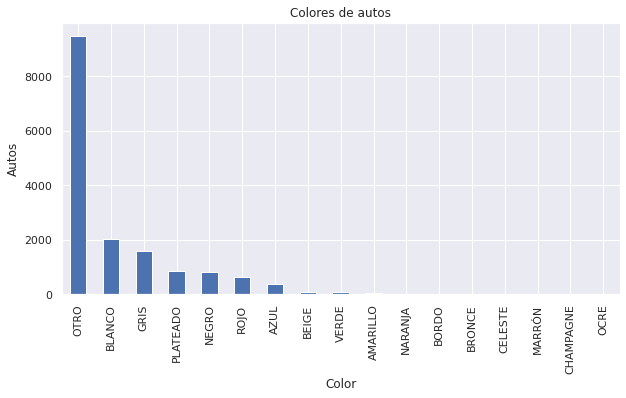

In [ ]:
# Histograma x color de auto
df.COLOR.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Colores de autos')
plt.ylabel('Autos')
plt.xlabel('Color');
df['COLOR'].value_counts()
######
### ⚠ En etapa 6, candidato eliminar, no aporta mucha informacion dado que la gran mayoria son "OTROS" 
######

MANUAL        8592
AUTOMATICA    7552
AUTOMATIC        7
Name: TRANSMISION, dtype: int64

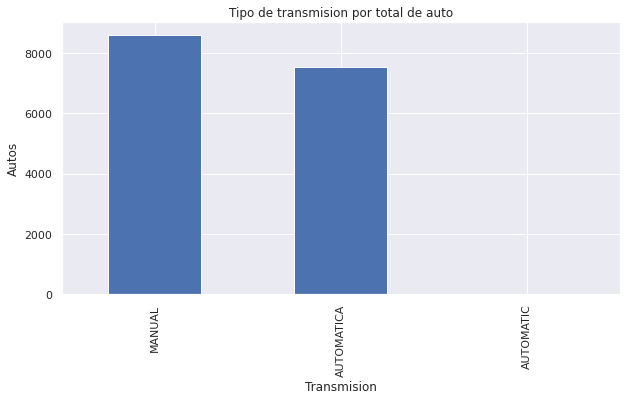

In [ ]:
# Histograma x transmision por total de autos
df.TRANSMISION.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Tipo de transmision por total de auto')
plt.ylabel('Autos')
plt.xlabel('Transmision');
df['TRANSMISION'].value_counts()
######
### En etapa 6, candidato limpieza ⚠
### Reemplazar "AUTOMATIC" x "AUTOMATICA"
######

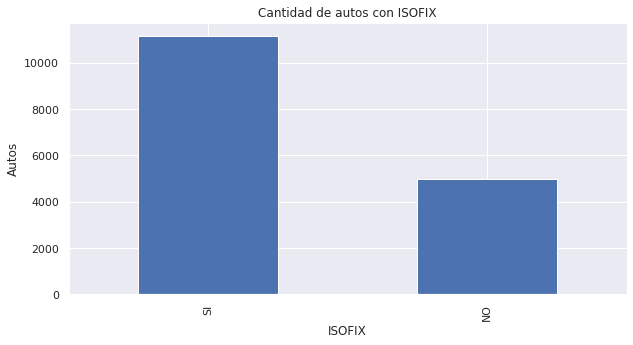

In [ ]:
# Histograma autos con ISOFIX
df.ISOFIX.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Cantidad de autos con ISOFIX')
plt.ylabel('Autos')
plt.xlabel('ISOFIX');

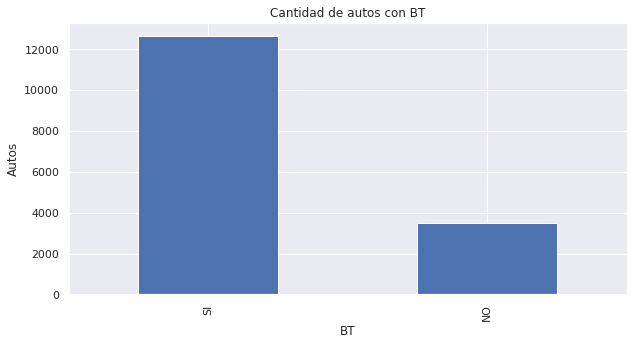

In [ ]:
# Histograma autos con BT
df.BLUETOOTH.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Cantidad de autos con BT')
plt.ylabel('Autos')
plt.xlabel('BT');
######
### ⚠ En etapa 6, candidato a considerar y eliminar MANOS LIBRES
### Hipotesis, si tiene BT, tiene manos libres
######

**DSM Etapa 5: Entiendimiento de los datos - Correlaciones entre variables**

*   Correlacion entre las variables   
*   Heatmap 

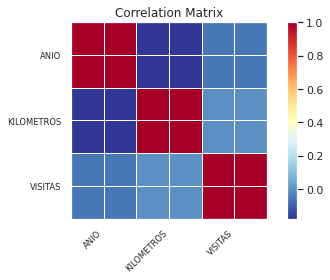

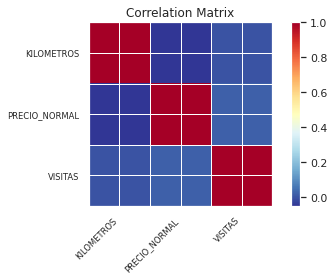

,ANIO,KILOMETROS,PRECIO_NORMAL,VISITAS
ANIO,1.000000,-0.178402,0.137762,-0.050414
KILOMETROS,-0.178402,1.000000,-0.052502,0.000410
PRECIO_NORMAL,0.137762,-0.052502,1.000000,0.021035
VISITAS,-0.050414,0.000410,0.021035,1.000000


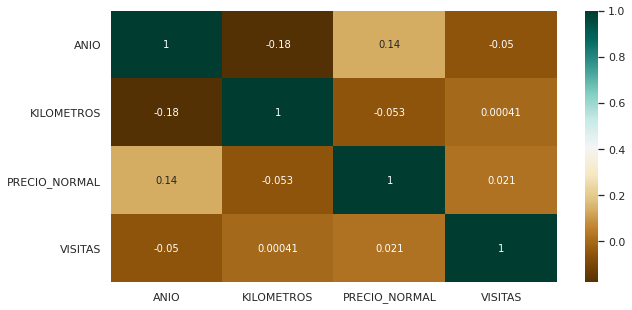

In [ ]:
# Correlación entre las variables
corr = df.set_index('PRECIO_NORMAL').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Correlación entre las variables
corr = df.set_index('ANIO').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Mapa de calor para la relación entre variables
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

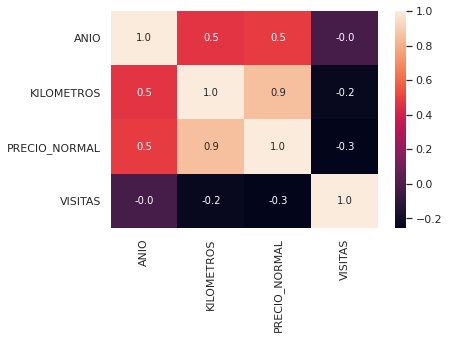

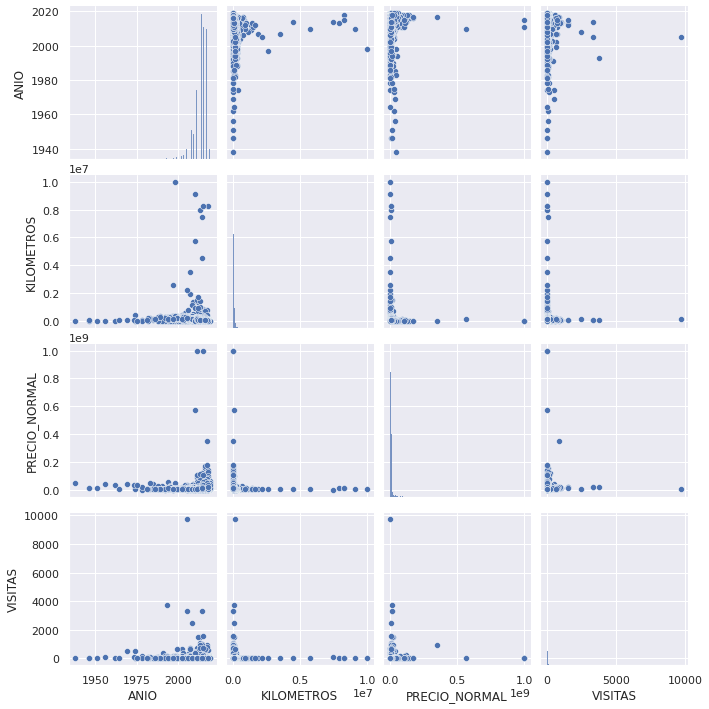

In [ ]:
#Filtremos en base a las estadísticas
df3 = df
df4 = df3.loc[(df3['ANIO']<=1990) & (df3['PRECIO_NORMAL']<=7000000) & (df3['KILOMETROS']<=150000) & (df3['KILOMETROS']>=10) & (df3['VISITAS']<=10000)]

df4.shape


#Correlación
sns.heatmap(df4.corr(), annot=True, fmt=".1f")
plt.show()

sns.pairplot(df)
plt.show()

sns.pairplot(df)
plt.show()

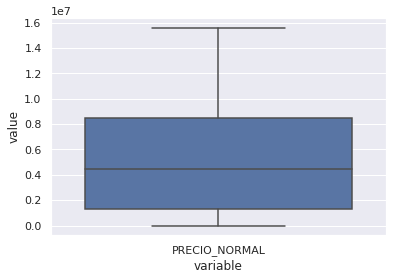

In [ ]:
df4 = df3.loc[(df3['ANIO']<=2000) & (df3['PRECIO_NORMAL']<=25000000) & (df3['KILOMETROS']<=100000) & (df3['KILOMETROS']>=10) & (df3['VISITAS']<=10000)]

sns.boxplot(x="variable", y="value", data=pd.melt(df4[['PRECIO_NORMAL']]))

plt.show()


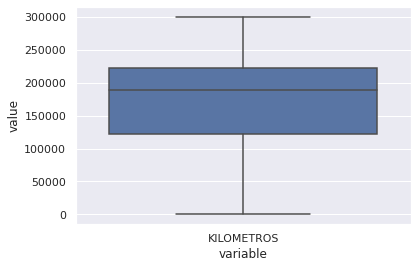

In [ ]:
df4 = df3.loc[(df3['ANIO']<=2000) & (df3['PRECIO_NORMAL']<=15000000) & (df3['KILOMETROS']<=300000) & (df3['KILOMETROS']>=10) & (df3['VISITAS']<=10000)]

sns.boxplot(x="variable", y="value", data=pd.melt(df4[['KILOMETROS']]))

plt.show()


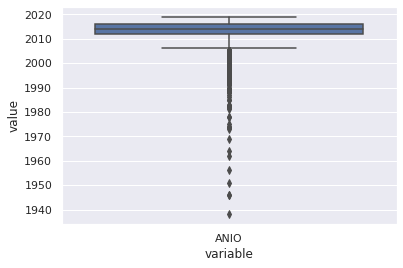

In [ ]:
df4 = df3.loc[(df3['ANIO']<=2020) & (df3['ANIO']>=1900)]

sns.boxplot(x="variable", y="value", data=pd.melt(df4[['ANIO']]))

plt.show()


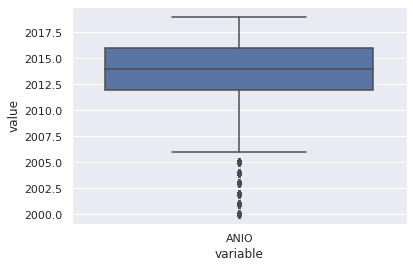

In [ ]:
df4 = df3.loc[(df3['ANIO']<=2020) & (df3['ANIO']>=2000)]

sns.boxplot(x="variable", y="value", data=pd.melt(df4[['ANIO']]))

plt.show()


**Pairplots** En conjuntos de datos con una pequeña cantidad de características (10 a 15), Seaborn Pairplots puede permitir rápidamente una inspección visual de cualquier relación entre variables. Los gráficos a lo largo de la diagonal izquierda representan la distribución de cada característica, mientras que los gráficos en diagonales muestran la relación entre las variables.

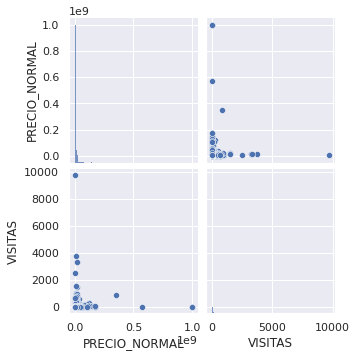

In [ ]:
sns.pairplot(df.loc[:,df.dtypes == 'float64'])

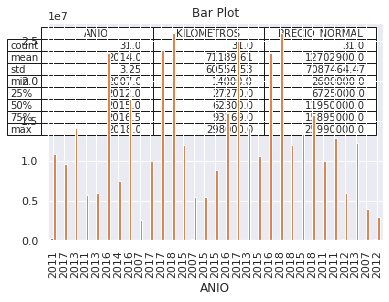

In [ ]:
from pandas.plotting import table
df1=df.loc[:30,['ANIO','KILOMETROS','PRECIO_NORMAL']]
ax=df1.plot('ANIO',['KILOMETROS','PRECIO_NORMAL'], kind = 'bar', title ='Bar Plot',
        legend=None)
table(ax, np.round(df1.describe(), 2),loc='upper right')

**Diagramas de dispersion** para ver la relacion entre dos variables. Los puntos no solo informan los valores de puntos de datos de cada auto, sino también patrones cuando los datos se toman como un todo. Esto permite identificar la correlación entre ambas columnas para validar nuestras hipotesis 
⚠⚠ Dada la gran cantidad de modelos en el dataset. Se filtro por modelo SANTA FE y RAV-4 que son los top 2 modelos para realizar las validaciones de hipotesis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


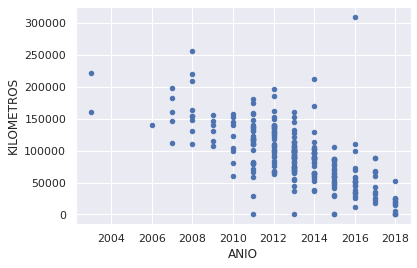

In [ ]:
# Scatter plot para validar hipotesis de que mientras mas antiguo un auto, mas kilometros tendra
santafe=df[df['VERSION']=="SANTA FE"]
santafe.plot(kind='scatter', x='ANIO', y='KILOMETROS')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


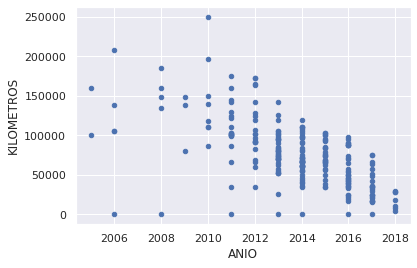

In [ ]:
# Scatter plot para validar hipotesis de que mientras mas antiguo un auto, mas kilometros tendra
rav4=df[df['VERSION']=="RAV-4"]
rav4.plot(kind='scatter', x='ANIO', y='KILOMETROS')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


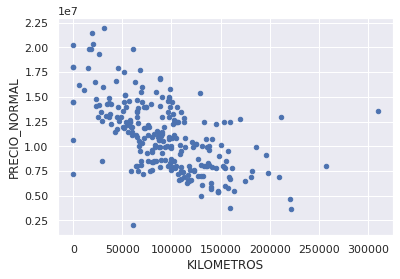

In [ ]:
# Scatter plot para validar hipotesis de mientras mas kilometros mas barato el auto
santafe=df[df['VERSION']=="SANTA FE"]
santafe.plot(kind='scatter', x='KILOMETROS', y='PRECIO_NORMAL')
##
# Outliers identificado en PRECIO Santa fe
##

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


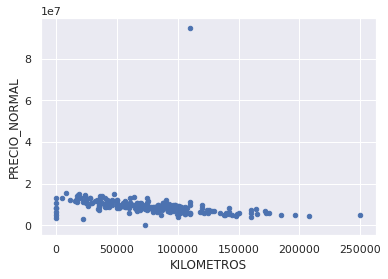

In [ ]:
# Scatter plot para validar hipotesis de mientras mas kilometros mas barato el auto
rav4=df[df['VERSION']=="RAV-4"]
rav4.plot(kind='scatter', x='KILOMETROS', y='PRECIO_NORMAL')
##
# Outliers identificado en PRECIO RAV-4
##

**DSM Etapa 5: Entiendimiento de los datos - IQR**
El rango intercuartil (IQR) es una medida de variabilidad, que se basa en dividir un conjunto de datos en cuartiles. Los cuartiles dividen un conjunto de datos ordenados por rango en cuatro partes iguales. Los valores que dividen cada parte se denominan primer, segundo y tercer cuartiles; y se indican con Q1, Q2 y Q3, respectivamente. Q1 es el valor "medio" en la primera mitad del conjunto de datos ordenados por rango. Q2 es el valor mediano del conjunto
Q3 es el valor "medio" en la segunda mitad del conjunto de datos ordenados por rango. El rango intercuartílico es igual a Q3 menos Q1.


In [ ]:
# IQR para todos los autos
print("IQR para todos los autos del dataset:")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# IQR solo para Santa fe
print("IQR solo VERSION SANTA FE:")
santafe=df[df['VERSION']=="SANTA FE"]
Q1s = santafe.quantile(0.25)
Q3s = santafe.quantile(0.75)
IQRs = Q3s - Q1s
print(IQRs)

# IQR solo para Santa fe
print("IQR solo VERSION RAV4:")
santafe=df[df['VERSION']=="RAV-4"]
Q1s = santafe.quantile(0.25)
Q3s = santafe.quantile(0.75)
IQRs = Q3s - Q1s
print(IQRs)


IQR para todos los autos del dataset:
ANIO                  4.00
KILOMETROS        64000.00
PRECIO_NORMAL   5790000.00
VISITAS              27.00
dtype: float64
IQR solo VERSION SANTA FE:
ANIO                  3.00
KILOMETROS        57701.50
PRECIO_NORMAL   5440000.00
VISITAS              27.00
dtype: float64
IQR solo VERSION RAV4:
ANIO                  4.00
KILOMETROS        50000.00
PRECIO_NORMAL   3675000.00
VISITAS              27.75
dtype: float64


**Outliers** En estadística, un valor atípico es un punto de observación que está distante de otras observaciones.

[nan nan nan ... nan nan nan]


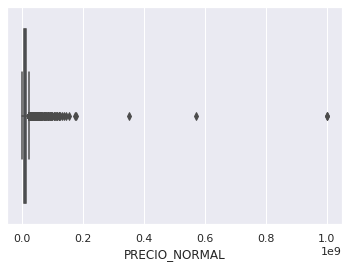

In [ ]:
# Outlier en valor de venta de los autos. 0.4, 0.5, 1. No incluidas en el "box" de observacion.
sns.boxplot(x=df['PRECIO_NORMAL'])
z=np.abs(stats.zscore(df['PRECIO_NORMAL']))
print(z)

[0.59910776 0.88090075 0.10577159 ... 0.10577159 2.07911627 0.63423266]


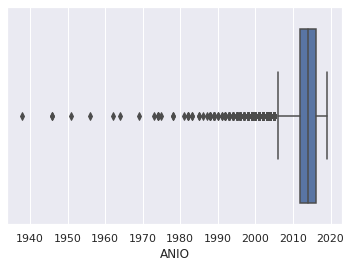

In [ ]:
# Outlier años 1940, 1950, 1960. Normaliza entre 2010 y 2020
sns.boxplot(x=df['ANIO'])
z=np.abs(stats.zscore(df['ANIO']))
print(z)

[1.15469453 0.30441394 0.09136295 ... 0.04008269 0.70004479 0.22670055]


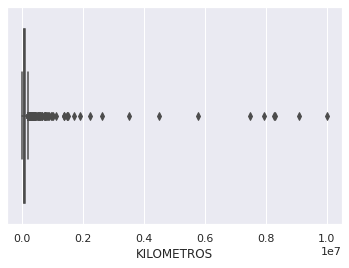

In [ ]:
# Outlier en años 1940, 1950, 1960. Normaliza entre 2010 y 2020
sns.boxplot(x=df['KILOMETROS'])
z=np.abs(stats.zscore(df['KILOMETROS']))
print(z)

**Etapa 6 - Preparacion de los datos**
* Limpieza
* Transformacion
* Eliminar nulls 
* Eliminar datos duplicados

## Trabajo Parte 2 - Predicción valor de auto utilizando Random Forest

In [ ]:
#Cargar un monton de librerías ¯\_(ツ)_/¯
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

sns.set_theme()

In [ ]:
# Leer el archivo csv ya procesado a un Dataframe
# El pre-procesamiento del dataset incluye:
#   Modificar las varaibles categoricas a numericas
#   Usar 999 o  similar para las celdas en blanco que son importantes
#   Exportar a csv

# Montar Google Drive - Problemas con shared, asi que lo deje en el home
from google.colab import drive
drive.mount('/content/drive')

# Leer el csv y cargarlo a un Dataframe
df = pd.read_csv("/content/drive/My Drive/Data_Autos_Ejemplo999.csv")

# Ver el tipo de dato de cada columna
df.dtypes

# Imprimir primeras 5 columnas
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ANIO,COLOR,COMBUSTIBLE,COMUNA,CONDICION,KILOMETROS,MARCA,PRECIO_NORMAL,PUERTAS,REGION,TIPO_AVISO,TIPO_CATEGORIA,TIPO_DIRECCION,TIPO_VEHICULO,TRANSMISION,VERSION,VISITAS,AIRBAG_ACOMP,AIRBAG_CONDUC,AIRBAG_CORTINA,AIRBAG_LAT,AIRBAG_TRAS,ALARMA,CIERRE_AUT_MOV,FRENOS_ABS,ISOFIX,AIRE_ACON,BLUETOOTH,CNTRL_VEL_CRUCERO,GPS,MANOS_LIBRES
0,2011,AMARILLO,BENCINA,PUENTE ALTO,USADO,298000,TOYOTA,10900000,4,RM,PARTICULAR,SEDAN,ASISTIDA,9999,MANUAL,YARIS,7,SI,NO,SI,SI,SI,SI,SI,NO,SI,NO,NO,SI,SI,SI
1,2017,OTRO,DIESEL,LINARES,USADO,22000,CITROEN,9650000,5 o MAS,VII REGION,PARTICULAR,HATCHBACK,ASISTIDA,9999,MANUAL,C3,0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,SI,SI,SI
2,2013,OTRO,BENCINA,SANTIAGO,USADO,62300,SUBARU,14150000,2,RM,PARTICULAR,COUPA,ASISTIDA,9999,MANUAL,BRZ,67,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
3,2011,OTRO,BENCINA,SANTIAGO,USADO,95000,SKODA,5650000,5 o MAS,RM,PARTICULAR,HATCHBACK,HIDRAULICA,9999,AUTOMATICA,OCTAVIA,0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
4,2013,OTRO,BENCINA,SANTIAGO,USADO,64000,FORD,5900000,5 o MAS,RM,PARTICULAR,HATCHBACK,HIDRAULICA,9999,MANUAL,FIESTA,0,SI,SI,SI,SI,SI,SI,SI,NO,SI,NO,SI,SI,SI,SI


In [ ]:
y = df['PRECIO_NORMAL']
X = df.drop(['PRECIO_NORMAL'], axis = 1)

# Dividir el dataset para entrenamiento y para test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': None,
              'max_leaf_nodes': None}

RF_model = RandomForestClassifier(**parameters)
RF_model.fit(train_X, train_y)

RF_predictions = RF_model.predict(test_X)

# Calcular el accuracy (muy malo, siempre menos de 80%)

score = accuracy_score(test_y ,RF_predictions)
print("----> El accuracy es ", score)


ValueError: ignored

Feature: 0, Score: 0.00294
Feature: 1, Score: 0.00491
Feature: 2, Score: 0.00274
Feature: 3, Score: 0.00278
Feature: 4, Score: 0.52932
Feature: 5, Score: 0.42232
Feature: 6, Score: 0.02608
Feature: 7, Score: 0.00292
Feature: 8, Score: 0.00327
Feature: 9, Score: 0.00270


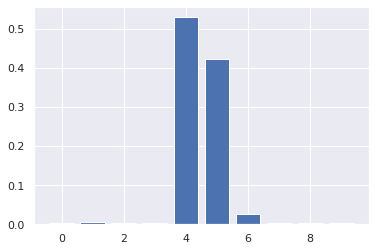

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# definir dataset
train_X, train_y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# definir modelo
model = RandomForestRegressor()
# fit 
model.fit(train_X, train_y)
#  
importance = model.feature_importances_
#  feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# Leer el archivo csv ya procesado a un Dataframe
# El pre-procesamiento del dataset incluye:
#   Modificar las varaibles categoricas a numericas
#   Usar 999 o  similar para las celdas en blanco que son importantes
#   Exportar a csv

# Montar Google Drive - Problemas con shared, asi que lo deje en el home
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Data_Autos_Ejemplo_Original.csv")
# Imprimir primeras 5 columnas
df.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
df.info()
df.isnull().any()
df = df.fillna(method='ffill')
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16159 entries, 0 to 16158
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANIO               16159 non-null  int64  
 1   COLOR              16117 non-null  object 
 2   COMBUSTIBLE        16151 non-null  object 
 3   COMUNA             16125 non-null  object 
 4   CONDICION          6656 non-null   object 
 5   KILOMETROS         16159 non-null  int64  
 6   MARCA              16151 non-null  object 
 7   PRECIO_NORMAL      16146 non-null  float64
 8   PUERTAS            16117 non-null  object 
 9   REGION             16125 non-null  object 
 10  TIPO_AVISO         11482 non-null  object 
 11  TIPO_CATEGORIA     16117 non-null  object 
 12  TIPO_DIRECCION     6141 non-null   object 
 13  TIPO_VEHICULO      34 non-null     object 
 14  TRANSMISION        16151 non-null  object 
 15  VERSION            16148 non-null  object 
 16  VISITAS            161

ANIO                 False
COLOR                False
COMBUSTIBLE          False
COMUNA               False
CONDICION            False
KILOMETROS           False
MARCA                False
PRECIO_NORMAL        False
PUERTAS              False
REGION               False
TIPO_AVISO           False
TIPO_CATEGORIA       False
TIPO_DIRECCION       False
TIPO_VEHICULO         True
TRANSMISION          False
VERSION              False
VISITAS              False
AIRBAG_ACOMP         False
AIRBAG_CONDUC        False
AIRBAG_CORTINA       False
AIRBAG_LAT           False
AIRBAG_TRAS          False
ALARMA               False
CIERRE_AUT_MOV       False
FRENOS_ABS           False
ISOFIX               False
AIRE_ACON            False
BLUETOOTH            False
CNTRL_VEL_CRUCERO    False
GPS                  False
MANOS_LIBRES         False
dtype: bool

In [ ]:
# Convertir variables categóricas  a numéricas 
import pandas as pd

df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

df.head()

,ANIO,KILOMETROS,PRECIO_NORMAL,VISITAS,COLOR_AMARILLO,COLOR_AZUL,COLOR_BEIGE,COLOR_BLANCO,COLOR_BORDO,COLOR_BRONCE,COLOR_CELESTE,COLOR_CHAMPAGNE,COLOR_GRIS,COLOR_MARRÓN,COLOR_NARANJA,COLOR_NEGRO,COLOR_OCRE,COLOR_OTRO,COLOR_PLATEADO,COLOR_ROJO,COLOR_VERDE,COMBUSTIBLE_BENCINA,COMBUSTIBLE_DIESEL,COMBUSTIBLE_GAS,COMBUSTIBLE_GASOLINA,COMBUSTIBLE_HÍBRIDO,COMBUSTIBLE_OTRO,COMUNA_ALHUE,COMUNA_ALTO HOSPICIO,COMUNA_ANGOL,COMUNA_ANTOFAGASTA,COMUNA_ARAUCO,COMUNA_ARICA,COMUNA_BUIN,COMUNA_BULNES,COMUNA_CABRERO,COMUNA_CALAMA,COMUNA_CALDERA,COMUNA_CALERA DE TANGO,COMUNA_CANELA,...,VERSION_X4,VERSION_X5,VERSION_X50,VERSION_X55,VERSION_X6,VERSION_X60,VERSION_XC 60,VERSION_XC 70,VERSION_XC 90,VERSION_XE,VERSION_XENON,VERSION_XF,VERSION_XJ,VERSION_XK,VERSION_XL7,VERSION_XLV,VERSION_XSARA,VERSION_XSARA PICASSO,VERSION_XUV 500,VERSION_XV,VERSION_YARIS,VERSION_YETI,VERSION_Z4,VERSION_ZAFIRA,VERSION_ZELAS,VERSION_ZHONGYI,AIRBAG_ACOMP_SI,AIRBAG_CONDUC_SI,AIRBAG_CORTINA_SI,AIRBAG_LAT_SI,AIRBAG_TRAS_SI,ALARMA_SI,CIERRE_AUT_MOV_SI,FRENOS_ABS_SI,ISOFIX_SI,AIRE_ACON_SI,BLUETOOTH_SI,CNTRL_VEL_CRUCERO_SI,GPS_SI,MANOS_LIBRES_SI
0,2011,298000,10900000,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,1,1,1
1,2017,22000,9650000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1
2,2013,62300,14150000,67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1
3,2011,95000,5650000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1
4,2013,64000,5900000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1


In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.PRECIO_NORMAL
X= df.drop('PRECIO_NORMAL',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(12927, 1272) (12927,)
(3232, 1272) (3232,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 1923158.86
Mean Squared Error: 152791090242834.06
Root Mean Squared Error: 12360869.32


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 1841364.94
Mean Squared Error: 151714747156201.8
Root Mean Squared Error: 12317254.04


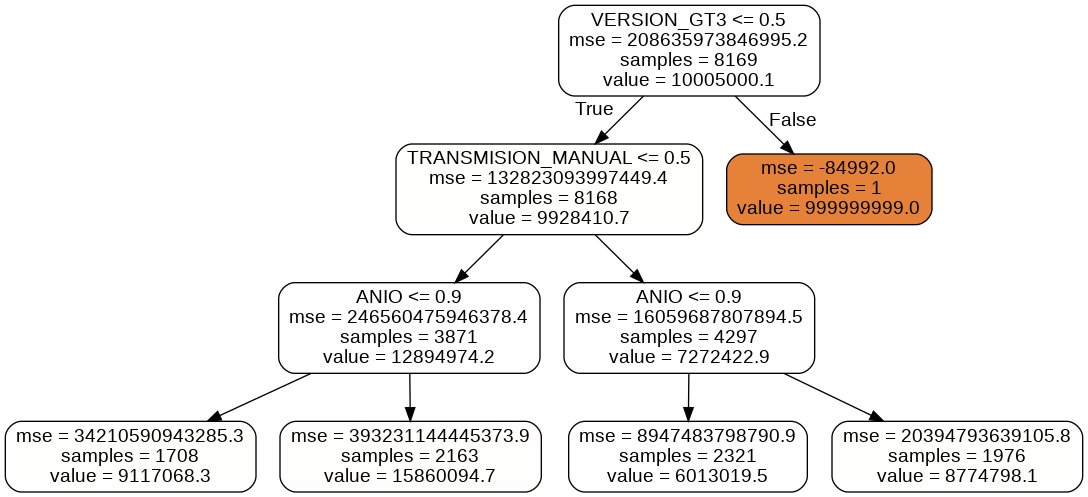

In [ ]:
# Visualizando el arbol de decision

# Importar herramientas necesarias
rf= regressor
features= df.drop('PRECIO_NORMAL', axis = 1)

# Guardar las feature list
feature_list = list(features.columns)
# Convertir a un array np
features = np.array(features)

# Librerias de visualizacion
from sklearn.tree import export_graphviz
import pydot

# Limitar el arbol a maximo 3
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extraer el arbol mas pequeño
tree_small = rf_small.estimators_[5]
# Para guardar la imagn
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

# Mostrar en el notebook
from IPython.display import Image
Image(filename = 'small_tree.png')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: VERSION_GT3          Importance: 0.24
Variable: ANIO                 Importance: 0.08
Variable: MARCA_AUDI           Importance: 0.07
Variable: VERSION_A3           Importance: 0.07
Variable: KILOMETROS           Importance: 0.05
Variable: TRANSMISION_MANUAL   Importance: 0.05
Variable: COLOR_VERDE          Importance: 0.04
Variable: MARCA_FERRARI        Importance: 0.04
Variable: TIPO_DIRECCION_HIDRAULICA Importance: 0.04
Variable: TIPO_CATEGORIA_HATCHBACK Importance: 0.03
Variable: VISITAS              Importance: 0.02
Variable: MARCA_PORSCHE        Importance: 0.02
Variable: COLOR_BLANCO         Importance: 0.01
Variable: COLOR_OTRO           Importance: 0.01
Variable: COMBUSTIBLE_DIESEL   Importance: 0.01
Variable: COMUNA_LAS CONDES    Importance: 0.01
Variable: MARCA_BMW            Importance: 0.01
Variable: MARCA_MASERATI       Importance: 0.01
Variable: MARCA_MCLAREN        Importance: 0.01
Variable: MARCA_MERCEDES BENZ  Importance: 0.01
Variable: PUERTAS_5 o MAS      

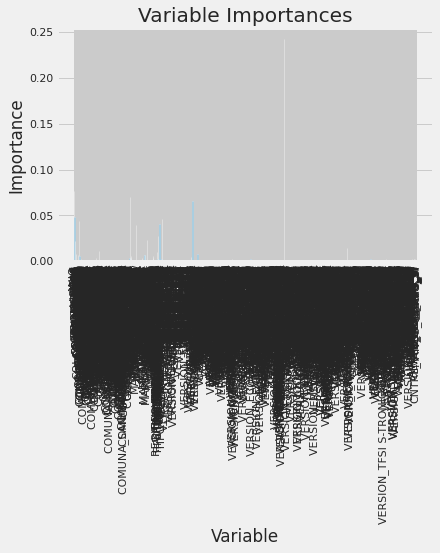

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

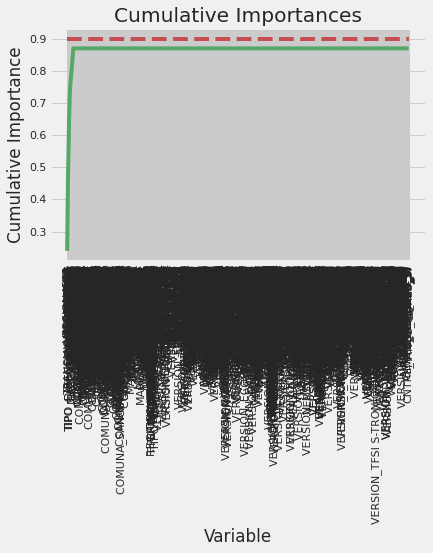

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [ ]:
import pandas as pd

# Montar Google Drive - Problemas con shared, asi que lo deje en el home
from google.colab import drive
drive.mount('/content/drive')

# Leer el csv y cargarlo a un Dataframe
df = pd.read_csv("/content/drive/My Drive/Data_Autos_Ejemplo999.csv")

# Ver el tipo de dato de cada columna
df.dtypes

# Imprimir primeras 5 columnas
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ANIO,COLOR,COMBUSTIBLE,COMUNA,CONDICION,KILOMETROS,MARCA,PRECIO_NORMAL,PUERTAS,REGION,TIPO_AVISO,TIPO_CATEGORIA,TIPO_DIRECCION,TIPO_VEHICULO,TRANSMISION,VERSION,VISITAS,AIRBAG_ACOMP,AIRBAG_CONDUC,AIRBAG_CORTINA,AIRBAG_LAT,AIRBAG_TRAS,ALARMA,CIERRE_AUT_MOV,FRENOS_ABS,ISOFIX,AIRE_ACON,BLUETOOTH,CNTRL_VEL_CRUCERO,GPS,MANOS_LIBRES
0,2011,AMARILLO,BENCINA,PUENTE ALTO,USADO,298000,TOYOTA,10900000,4,RM,PARTICULAR,SEDAN,ASISTIDA,9999,MANUAL,YARIS,7,SI,NO,SI,SI,SI,SI,SI,NO,SI,NO,NO,SI,SI,SI
1,2017,OTRO,DIESEL,LINARES,USADO,22000,CITROEN,9650000,5 o MAS,VII REGION,PARTICULAR,HATCHBACK,ASISTIDA,9999,MANUAL,C3,0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,SI,SI,SI
2,2013,OTRO,BENCINA,SANTIAGO,USADO,62300,SUBARU,14150000,2,RM,PARTICULAR,COUPA,ASISTIDA,9999,MANUAL,BRZ,67,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
3,2011,OTRO,BENCINA,SANTIAGO,USADO,95000,SKODA,5650000,5 o MAS,RM,PARTICULAR,HATCHBACK,HIDRAULICA,9999,AUTOMATICA,OCTAVIA,0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
4,2013,OTRO,BENCINA,SANTIAGO,USADO,64000,FORD,5900000,5 o MAS,RM,PARTICULAR,HATCHBACK,HIDRAULICA,9999,MANUAL,FIESTA,0,SI,SI,SI,SI,SI,SI,SI,NO,SI,NO,SI,SI,SI,SI


In [ ]:
#De data categorica a numerica usando pandas dummies
features = pd.get_dummies(df)
features.iloc[:,5:].head(5)

,COLOR_AMARILLO,COLOR_AZUL,COLOR_BEIGE,COLOR_BLANCO,COLOR_BORDO,COLOR_BRONCE,COLOR_CELESTE,COLOR_CHAMPAGNE,COLOR_GRIS,COLOR_MARRÓN,COLOR_NARANJA,COLOR_NEGRO,COLOR_OCRE,COLOR_OTRO,COLOR_PLATEADO,COLOR_ROJO,COLOR_VERDE,COMBUSTIBLE_9999,COMBUSTIBLE_BENCINA,COMBUSTIBLE_DIESEL,COMBUSTIBLE_GAS,COMBUSTIBLE_GASOLINA,COMBUSTIBLE_HÍBRIDO,COMBUSTIBLE_OTRO,COMUNA_9999,COMUNA_ALHUE,COMUNA_ALTO HOSPICIO,COMUNA_ANGOL,COMUNA_ANTOFAGASTA,COMUNA_ARAUCO,COMUNA_ARICA,COMUNA_BUIN,COMUNA_BULNES,COMUNA_CABRERO,COMUNA_CALAMA,COMUNA_CALDERA,COMUNA_CALERA DE TANGO,COMUNA_CANELA,COMUNA_CANETE,COMUNA_CASTRO,...,VERSION_XL7,VERSION_XLV,VERSION_XSARA,VERSION_XSARA PICASSO,VERSION_XUV 500,VERSION_XV,VERSION_YARIS,VERSION_YETI,VERSION_Z4,VERSION_ZAFIRA,VERSION_ZELAS,VERSION_ZHONGYI,AIRBAG_ACOMP_NO,AIRBAG_ACOMP_SI,AIRBAG_CONDUC_NO,AIRBAG_CONDUC_SI,AIRBAG_CORTINA_NO,AIRBAG_CORTINA_SI,AIRBAG_LAT_NO,AIRBAG_LAT_SI,AIRBAG_TRAS_NO,AIRBAG_TRAS_SI,ALARMA_NO,ALARMA_SI,CIERRE_AUT_MOV_NO,CIERRE_AUT_MOV_SI,FRENOS_ABS_NO,FRENOS_ABS_SI,ISOFIX_NO,ISOFIX_SI,AIRE_ACON_NO,AIRE_ACON_SI,BLUETOOTH_NO,BLUETOOTH_SI,CNTRL_VEL_CRUCERO_NO,CNTRL_VEL_CRUCERO_SI,GPS_NO,GPS_SI,MANOS_LIBRES_NO,MANOS_LIBRES_SI
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1


In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
int(labels = np.array(features['PRECIO_NORMAL']))
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('PRECIO_NORMAL', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


IndexError: ignored

Random Forest

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Data_Autos_Ejemplo999.csv')
dataset.head()

,ANIO,COLOR,COMBUSTIBLE,COMUNA,CONDICION,KILOMETROS,MARCA,PRECIO_NORMAL,PUERTAS,REGION,TIPO_AVISO,TIPO_CATEGORIA,TIPO_DIRECCION,TIPO_VEHICULO,TRANSMISION,VERSION,VISITAS,AIRBAG_ACOMP,AIRBAG_CONDUC,AIRBAG_CORTINA,AIRBAG_LAT,AIRBAG_TRAS,ALARMA,CIERRE_AUT_MOV,FRENOS_ABS,ISOFIX,AIRE_ACON,BLUETOOTH,CNTRL_VEL_CRUCERO,GPS,MANOS_LIBRES
0,2011,AMARILLO,BENCINA,PUENTE ALTO,USADO,298000,TOYOTA,10900000,4,RM,PARTICULAR,SEDAN,ASISTIDA,9999,MANUAL,YARIS,7,SI,NO,SI,SI,SI,SI,SI,NO,SI,NO,NO,SI,SI,SI
1,2017,OTRO,DIESEL,LINARES,USADO,22000,CITROEN,9650000,5 o MAS,VII REGION,PARTICULAR,HATCHBACK,ASISTIDA,9999,MANUAL,C3,0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,SI,SI,SI
2,2013,OTRO,BENCINA,SANTIAGO,USADO,62300,SUBARU,14150000,2,RM,PARTICULAR,COUPA,ASISTIDA,9999,MANUAL,BRZ,67,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
3,2011,OTRO,BENCINA,SANTIAGO,USADO,95000,SKODA,5650000,5 o MAS,RM,PARTICULAR,HATCHBACK,HIDRAULICA,9999,AUTOMATICA,OCTAVIA,0,SI,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
4,2013,OTRO,BENCINA,SANTIAGO,USADO,64000,FORD,5900000,5 o MAS,RM,PARTICULAR,HATCHBACK,HIDRAULICA,9999,MANUAL,FIESTA,0,SI,SI,SI,SI,SI,SI,SI,NO,SI,NO,SI,SI,SI,SI


In [ ]:
# Convertir variables categóricas  a numéricas 
dataset = pd.get_dummies(dataset, prefix_sep='_', drop_first=True)
dataset.head()


,ANIO,KILOMETROS,PRECIO_NORMAL,VISITAS,COLOR_AMARILLO,COLOR_AZUL,COLOR_BEIGE,COLOR_BLANCO,COLOR_BORDO,COLOR_BRONCE,COLOR_CELESTE,COLOR_CHAMPAGNE,COLOR_GRIS,COLOR_MARRÓN,COLOR_NARANJA,COLOR_NEGRO,COLOR_OCRE,COLOR_OTRO,COLOR_PLATEADO,COLOR_ROJO,COLOR_VERDE,COMBUSTIBLE_BENCINA,COMBUSTIBLE_DIESEL,COMBUSTIBLE_GAS,COMBUSTIBLE_GASOLINA,COMBUSTIBLE_HÍBRIDO,COMBUSTIBLE_OTRO,COMUNA_ALHUE,COMUNA_ALTO HOSPICIO,COMUNA_ANGOL,COMUNA_ANTOFAGASTA,COMUNA_ARAUCO,COMUNA_ARICA,COMUNA_BUIN,COMUNA_BULNES,COMUNA_CABRERO,COMUNA_CALAMA,COMUNA_CALDERA,COMUNA_CALERA DE TANGO,COMUNA_CANELA,...,VERSION_X4,VERSION_X5,VERSION_X50,VERSION_X55,VERSION_X6,VERSION_X60,VERSION_XC 60,VERSION_XC 70,VERSION_XC 90,VERSION_XE,VERSION_XENON,VERSION_XF,VERSION_XJ,VERSION_XK,VERSION_XL7,VERSION_XLV,VERSION_XSARA,VERSION_XSARA PICASSO,VERSION_XUV 500,VERSION_XV,VERSION_YARIS,VERSION_YETI,VERSION_Z4,VERSION_ZAFIRA,VERSION_ZELAS,VERSION_ZHONGYI,AIRBAG_ACOMP_SI,AIRBAG_CONDUC_SI,AIRBAG_CORTINA_SI,AIRBAG_LAT_SI,AIRBAG_TRAS_SI,ALARMA_SI,CIERRE_AUT_MOV_SI,FRENOS_ABS_SI,ISOFIX_SI,AIRE_ACON_SI,BLUETOOTH_SI,CNTRL_VEL_CRUCERO_SI,GPS_SI,MANOS_LIBRES_SI
0,2011,298000,10900000,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,1,1,1
1,2017,22000,9650000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1
2,2013,62300,14150000,67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1
3,2011,95000,5650000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1
4,2013,64000,5900000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1


In [ ]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.006497524752475247
Mean Squared Error: 0.003307549504950495
Root Mean Squared Error: 0.057511298932909655


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

ValueError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Read data
cars = pd.read_csv('/content/drive/My Drive/Data_Autos_Ejemplo999.csv', encoding='utf-8', error_bad_lines=False, warn_bad_lines=False)
cars.sample(5)


,ANIO,COLOR,COMBUSTIBLE,COMUNA,CONDICION,KILOMETROS,MARCA,PRECIO_NORMAL,PUERTAS,REGION,TIPO_AVISO,TIPO_CATEGORIA,TIPO_DIRECCION,TIPO_VEHICULO,TRANSMISION,VERSION,VISITAS,AIRBAG_ACOMP,AIRBAG_CONDUC,AIRBAG_CORTINA,AIRBAG_LAT,AIRBAG_TRAS,ALARMA,CIERRE_AUT_MOV,FRENOS_ABS,ISOFIX,AIRE_ACON,BLUETOOTH,CNTRL_VEL_CRUCERO,GPS,MANOS_LIBRES
8276,2013,OTRO,BENCINA,QUILICURA,9999,54326,CHEVROLET,7390000,4,RM,9999,SEDAN,9999,9999,AUTOMATICA,CRUZE,20,NO,NO,SI,SI,SI,SI,SI,NO,NO,NO,SI,NO,SI,SI
16100,2017,OTRO,BENCINA,VITACURA,9999,29810,MITSUBISHI,9190000,5 o MAS,RM,9999,MONOVOLUMEN,9999,9999,MANUAL,OUTLANDER,10,NO,NO,SI,SI,SI,SI,SI,SI,NO,NO,NO,SI,SI,NO
7645,2016,OTRO,BENCINA,HUECHURABA,9999,54000,SUBARU,9990000,5 o MAS,RM,9999,MONOVOLUMEN,9999,9999,MANUAL,FORESTER,153,NO,NO,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI
12057,2015,NEGRO,DIESEL,SANTIAGO,9999,1,TATA,0,4,RM,9999,PICK UP,9999,9999,MANUAL,XENON,4,NO,NO,SI,SI,SI,NO,NO,SI,SI,NO,SI,SI,SI,SI
5796,2011,OTRO,BENCINA,LO BARNECHEA,9999,119503,MERCEDES BENZ,11990000,2,RM,9999,CAMIONETA,9999,9999,AUTOMATICA,ML 350,43,NO,SI,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI


In [ ]:
cars.columns


Index(['ANIO', 'COLOR', 'COMBUSTIBLE', 'COMUNA', 'CONDICION', 'KILOMETROS',
       'MARCA', 'PRECIO_NORMAL', 'PUERTAS', 'REGION', 'TIPO_AVISO',
       'TIPO_CATEGORIA', 'TIPO_DIRECCION', 'TIPO_VEHICULO', 'TRANSMISION',
       'VERSION', 'VISITAS', 'AIRBAG_ACOMP', 'AIRBAG_CONDUC', 'AIRBAG_CORTINA',
       'AIRBAG_LAT', 'AIRBAG_TRAS', 'ALARMA', 'CIERRE_AUT_MOV', 'FRENOS_ABS',
       'ISOFIX', 'AIRE_ACON', 'BLUETOOTH', 'CNTRL_VEL_CRUCERO', 'GPS',
       'MANOS_LIBRES'],
      dtype='object')

In [ ]:
cars['PRECIO_NORMAL'].describe()


count    1.615900e+04
mean     9.949742e+06
std      1.430623e+07
min      0.000000e+00
25%      5.900000e+06
50%      8.200000e+06
75%      1.169000e+07
max      1.000000e+09
Name: PRECIO_NORMAL, dtype: float64

Skewness: 46.537435
Kurtosis: 3009.260558


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\nWe can observe that the distribution of prices shows a high positive skewness \nto the left (skew > 1). A kurtosis value of 60 is extremely high, meaning that\nthere is a profusion of outliers in the dataset. We need to do something.\n'

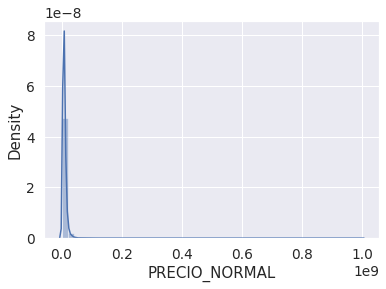

In [ ]:
sns.distplot(cars['PRECIO_NORMAL'])
#skewness and kurtosis
print("Skewness: %f" % cars['PRECIO_NORMAL'].skew())
print("Kurtosis: %f" % cars['PRECIO_NORMAL'].kurt())

"""
We can observe that the distribution of prices shows a high positive skewness 
to the left (skew > 1). A kurtosis value of 60 is extremely high, meaning that
there is a profusion of outliers in the dataset. We need to do something.
"""

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


"\nWe see that the lesser is the mileage, the higher tends to be the price. \nPrice and Mileage seem to be in an exponential relationship with negative\nexponent. It's a typical form of exponential decay.\n"

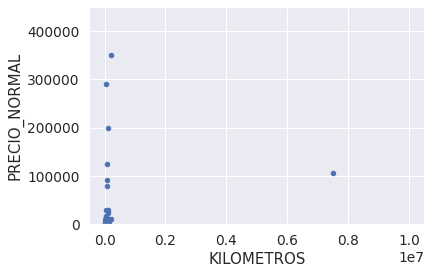

In [ ]:
attrib = 'KILOMETROS'
data = pd.concat([cars['PRECIO_NORMAL'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='PRECIO_NORMAL', ylim=(0,450000));

"""
We see that the lesser is the mileage, the higher tends to be the price. 
Price and Mileage seem to be in an exponential relationship with negative
exponent. It's a typical form of exponential decay.
"""

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'\nPrices tend to be higher as cars are more recent, and viceversa.\n'

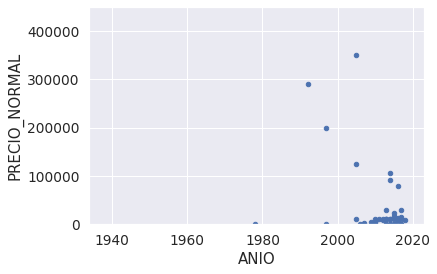

In [ ]:
attrib = 'ANIO'
data = pd.concat([cars['PRECIO_NORMAL'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='PRECIO_NORMAL', ylim=(0,450000));

"""
Prices tend to be higher as cars are more recent, and viceversa.
"""

'\nWe can observe there is a correlation between Price and Exotic/Luxury car manufacturers.\nOn a sidenote, there is a prevalence of low to medium budget cars in the dataset\n\nSeveral car manufacturers as Porsche, Audi, Chevreolet ecc.. have a strong \npresence of outliers, altought outliers may not be the right term because\nthose makers produce car models that cost more than others.\n'

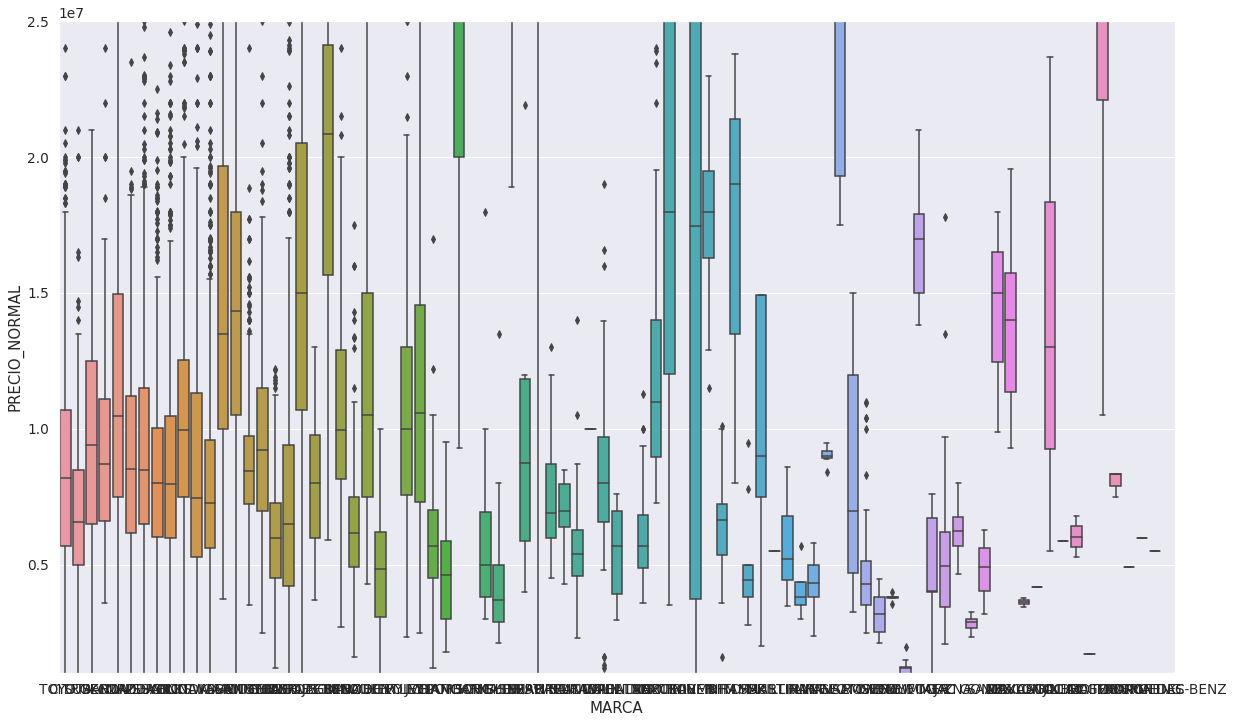

In [ ]:

attrib = 'MARCA'
data = pd.concat([cars['PRECIO_NORMAL'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=attrib, y="PRECIO_NORMAL", data=data)
fig.axis(ymin=1000000, ymax=25000000);

"""
We can observe there is a correlation between Price and Exotic/Luxury car manufacturers.
On a sidenote, there is a prevalence of low to medium budget cars in the dataset

Several car manufacturers as Porsche, Audi, Chevreolet ecc.. have a strong 
presence of outliers, altought outliers may not be the right term because
those makers produce car models that cost more than others.
"""

'\nWe can observe a slight increase of Prices the most recent years. Not a strong\ntendency though.\n'

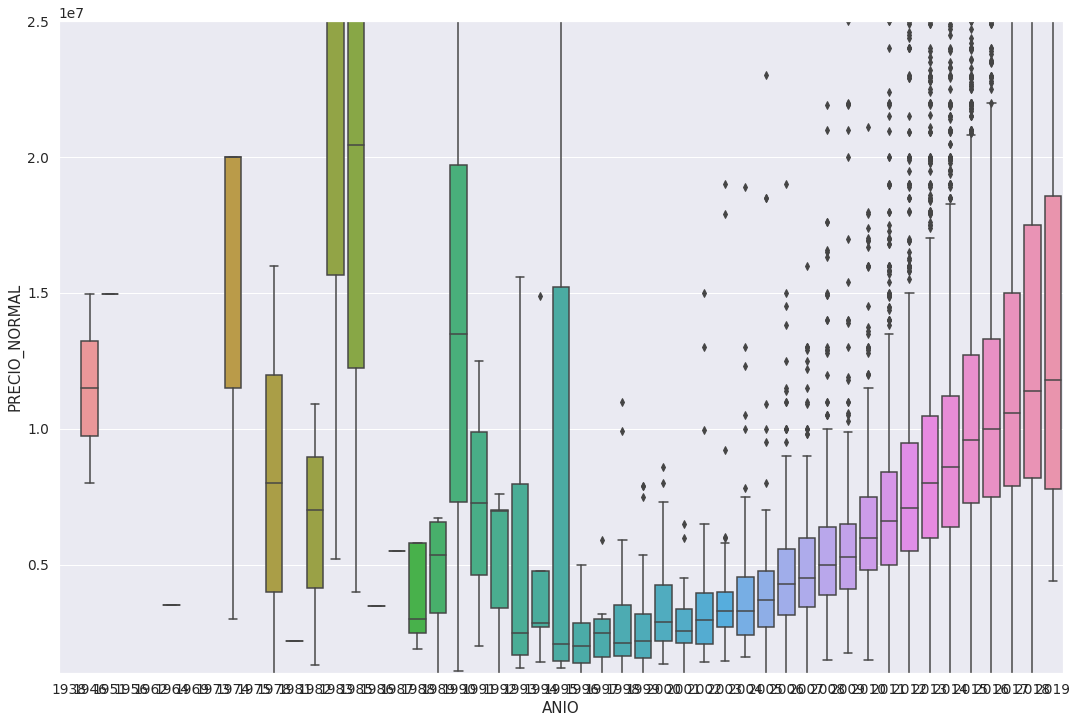

In [ ]:
# Box plot Year / Price

attrib = 'ANIO'
data = pd.concat([cars['PRECIO_NORMAL'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=attrib, y="PRECIO_NORMAL", data=data)
fig.axis(ymin=1000000, ymax=25000000);

"""
We can observe a slight increase of Prices the most recent years. Not a strong
tendency though.
"""

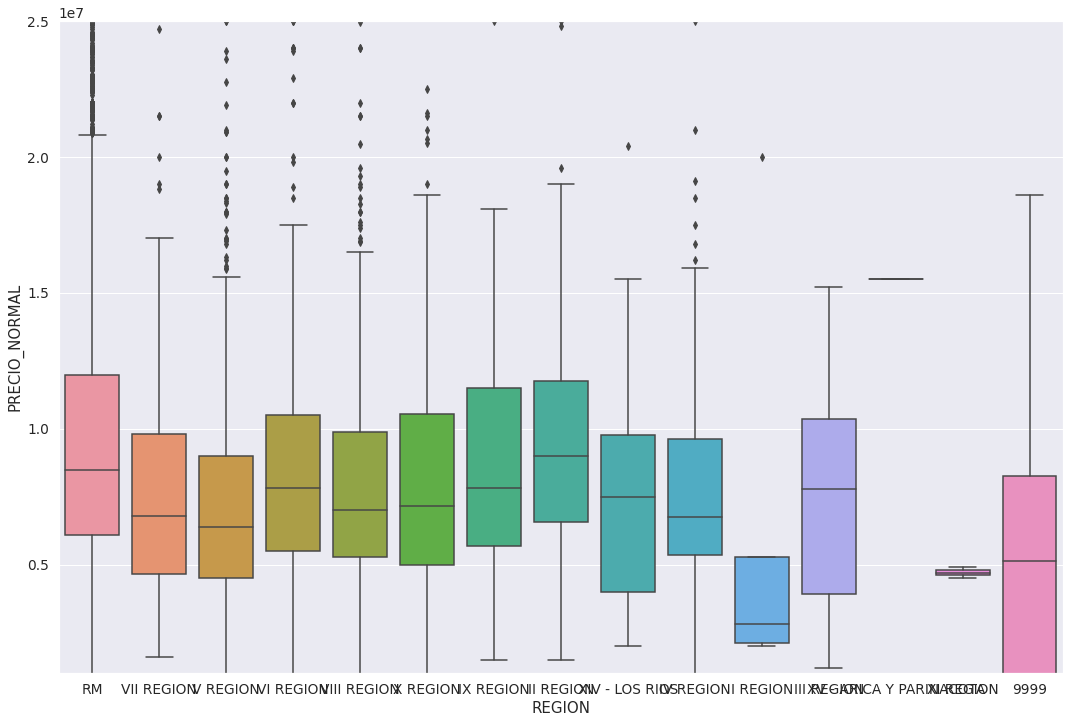

In [ ]:
# Box plot State / Price

attrib = 'REGION'
data = pd.concat([cars['PRECIO_NORMAL'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=attrib, y="PRECIO_NORMAL", data=data)
fig.axis(ymin=1000000, ymax=25000000);

In [ ]:
print("Find most important features relative to target")
corr = cars.corr()
corr.sort_values(["PRECIO_NORMAL"], ascending = False, inplace = True)
print(corr.PRECIO_NORMAL)

"""
Between Year and Price there is a positive correlation, meaning that the higher
is the Year (more recent), the higher is the Price (more recent cars cost more).
Between Price and Mileage there is a negative correlation, meaning that higher
is the mileage, lower is the Price (cars with high mileage cost less).

We obviously will get rid of Id attribute.
"""

Find most important features relative to target
PRECIO_NORMAL    1.000000
ANIO             0.137763
VISITAS         -0.005435
KILOMETROS      -0.052471
Name: PRECIO_NORMAL, dtype: float64


'\nBetween Year and Price there is a positive correlation, meaning that the higher\nis the Year (more recent), the higher is the Price (more recent cars cost more).\nBetween Price and Mileage there is a negative correlation, meaning that higher\nis the mileage, lower is the Price (cars with high mileage cost less).\n\nWe obviously will get rid of Id attribute.\n'

'\nThere is a mild positive correlation between Year and Price and a mild\nnegative correlation between Year and Mileage (as we have already said).\nMoreover the is a strong negative correlation between Mileage and Year,\nmeaning that the older is the car, the higher will be its mileage.\nObviously there are exceptions but that is the general trend.\n'

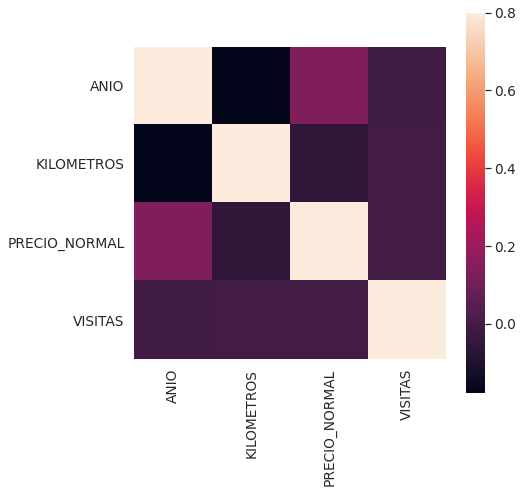

In [ ]:
# General correlation matrix
corrmat = cars.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

"""
There is a mild positive correlation between Year and Price and a mild
negative correlation between Year and Mileage (as we have already said).
Moreover the is a strong negative correlation between Mileage and Year,
meaning that the older is the car, the higher will be its mileage.
Obviously there are exceptions but that is the general trend.
"""

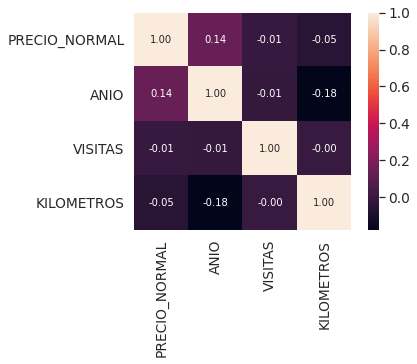

'\nThis plot shows what we said earies but in form of numbers.\n'

In [ ]:

# Price correlation matrix
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRECIO_NORMAL')['PRECIO_NORMAL'].index
cm = np.corrcoef(cars[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

"""
This plot shows what we said earies but in form of numbers.
"""

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


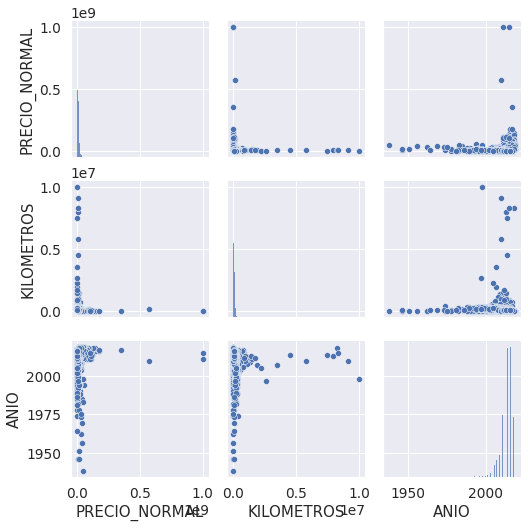

In [ ]:

# Scatter plot for numerical features
num_features = ["PRECIO_NORMAL", "KILOMETROS", "ANIO"]
sns.pairplot(cars[num_features], size = 2.5)
plt.show();

In [ ]:
#PRE PROCESAMIENTO
# Checking for missing values -> no missing values
cars.isnull().sum()

ANIO                 0
COLOR                0
COMBUSTIBLE          0
COMUNA               0
CONDICION            0
KILOMETROS           0
MARCA                0
PRECIO_NORMAL        0
PUERTAS              0
REGION               0
TIPO_AVISO           0
TIPO_CATEGORIA       0
TIPO_DIRECCION       0
TIPO_VEHICULO        0
TRANSMISION          0
VERSION              0
VISITAS              0
AIRBAG_ACOMP         0
AIRBAG_CONDUC        0
AIRBAG_CORTINA       0
AIRBAG_LAT           0
AIRBAG_TRAS          0
ALARMA               0
CIERRE_AUT_MOV       0
FRENOS_ABS           0
ISOFIX               0
AIRE_ACON            0
BLUETOOTH            0
CNTRL_VEL_CRUCERO    0
GPS                  0
MANOS_LIBRES         0
dtype: int64

In [ ]:
# Checking for plausible values of numerical features -> we can see that the maximum value of mileage is 77milion km
# we need to fix these problems
cars.describe()

,ANIO,KILOMETROS,PRECIO_NORMAL,VISITAS
count,16159.000000,1.615900e+04,1.615900e+04,16159.000000
mean,2013.428801,7.958191e+04,9.949742e+06,55.553623
std,4.054156,1.891625e+05,1.430623e+07,518.313400
min,1938.000000,0.000000e+00,0.000000e+00,0.000000
25%,2012.000000,3.600000e+04,5.900000e+06,6.000000
50%,2014.000000,6.580000e+04,8.200000e+06,15.000000
75%,2016.000000,1.000000e+05,1.169000e+07,33.000000
max,2019.000000,9.999999e+06,1.000000e+09,9999.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


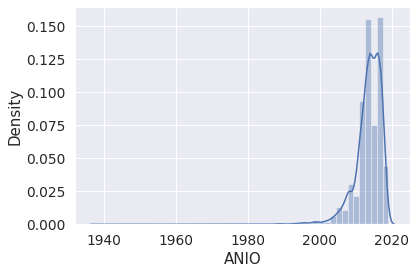

In [ ]:
# Record distribution over the year
sns.distplot((cars["ANIO"]))

In [ ]:
# Checking values of categorical features
cat_val = ["REGION", "COLOR", "CONDICION", "MARCA","VERSION", "PUERTAS", "AIRBAG_ACOMP"]
for col in cat_val:
    print ([col]," : ",cars[col].unique())
    
# Features like Id, State and Vin can be discarded because wouldn't bring anything good to our purpose

['REGION']  :  ['RM' 'VII REGION' 'V REGION' 'VI REGION' 'VIII REGION' 'X REGION'
 'IX REGION' 'II REGION' 'XIV - LOS RIOS' 'IV REGION' 'I REGION'
 'III REGION' 'XV - ARICA Y PARINACOTA' 'XI REGION' '9999']
['COLOR']  :  ['AMARILLO' 'OTRO' 'ROJO' 'BLANCO' 'NEGRO' 'GRIS' 'PLATEADO' 'NARANJA'
 'AZUL' '9999' 'BEIGE' 'VERDE' 'BORDO' 'BRONCE' 'MARRÓN' 'CELESTE'
 'CHAMPAGNE' 'OCRE']
['CONDICION']  :  ['USADO' '9999' 'PRIMER DUENO']
['MARCA']  :  ['TOYOTA' 'CITROEN' 'SUBARU' 'SKODA' 'FORD' 'MAZDA' 'NISSAN' 'PEUGEOT'
 'HYUNDAI' 'HONDA' 'VOLKSWAGEN' 'KIA' 'BMW' 'AUDI' 'SSANGYONG'
 'MITSUBISHI' 'SUZUKI' 'CHEVROLET' 'MERCEDES BENZ' 'ALFA ROMEO' 'JAGUAR'
 'MINI' 'RENAULT' 'DODGE' 'CHERY' 'BENTLEY' 'VOLVO' 'JEEP' 'FIAT'
 'CHANGAN' 'PORSCHE' 'LAMBORGHINI' 'CHRYSLER' 'BYD' 'MASERATI' '9999'
 'FERRARI' 'MAHINDRA' 'BAIC' 'GREAT WALL' 'LINCOLN' 'OPEL' 'DAIHATSU'
 'ASTON MARTIN' 'MG' 'LEXUS' 'LAND ROVER' 'MCLAREN' 'TRIUMPH' 'INFINITI'
 'DFM' 'RAM' 'DFSK' 'SMART' 'AUSTIN' 'BRILLIANCE' 'FAW' 'LIFAN' 'HAVAL

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


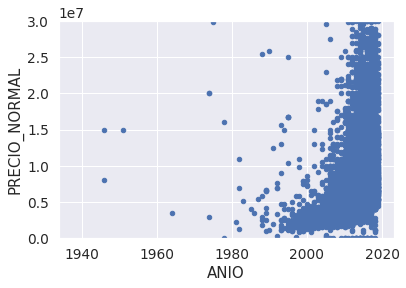

In [ ]:
# Bivariate analysis Price / Year
attrib = 'ANIO'
data = pd.concat([cars['PRECIO_NORMAL'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='PRECIO_NORMAL', ylim=(0,30000000));

"\nWe can see a certain number of outliers. Now we'll try to get rid of those.\n"

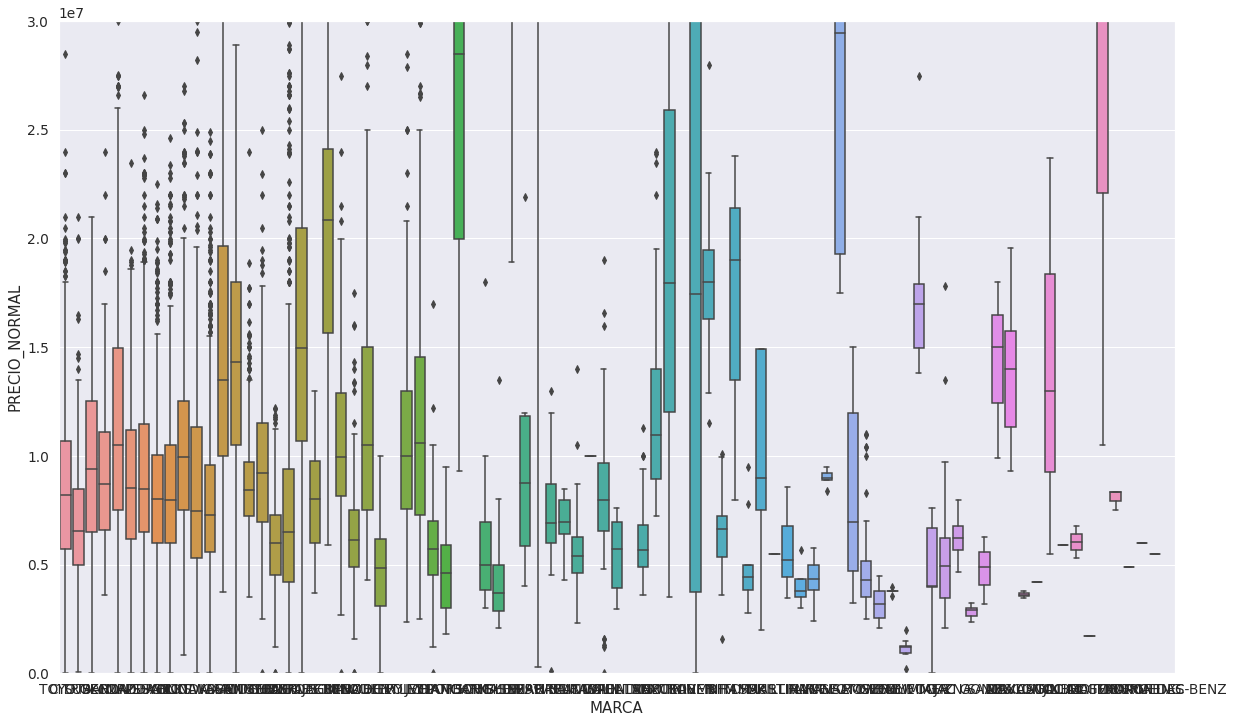

In [ ]:

attrib = 'MARCA'
data = pd.concat([cars['PRECIO_NORMAL'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=attrib, y="PRECIO_NORMAL", data=data)
fig.axis(ymin=0, ymax=30000000);

"""
We can see a certain number of outliers. Now we'll try to get rid of those.
"""

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


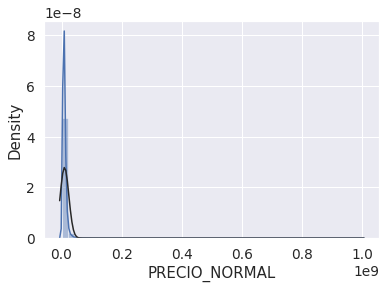

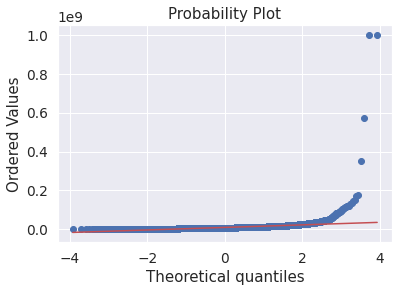

In [ ]:
# Distribution of prices
from scipy.stats import norm
from scipy import stats

# Using Histogram and normal probability plot
sns.distplot(cars['PRECIO_NORMAL'], fit=norm);
fig = plt.figure()
res = stats.probplot(cars['PRECIO_NORMAL'], plot=plt)

In [ ]:
# LABEL ENCODING
features = ['MARCA', 'VERSION']
les = {}

for f in features:
  les[f] = preprocessing.LabelEncoder()
  les[f] = les[f].fit(cars[f])
  cleaned_cars[f] = les[f].transform(cars[f])

In [ ]:
# Splitting the dataset into train and test sets
train_set, test_set = train_test_split(cleaned_cars, test_size = 0.33, random_state = 42)

"""
The Test Set in this case is our Hold-out set that we'll be using later
for final validation
"""

# Separating target labels from the rest
cars_train = train_set.drop("PRECIO_NORMAL", axis=1) #train without target
cars_price_train = train_set["PRECIO_NORMAL"].copy() #target

cars_test  = test_set.drop("PRECIO_NORMAL", axis=1)
cars_price_test = test_set["PRECIO_NORMAL"].copy()

In [ ]:
# This function returns the best score achieved by the model over all the cv splits
def best_score(forest, cv):
  best_score = 0
  for i in range(0, cv):
    items = list(map(lambda x: abs(x), forest.cv_results_['split'+str(i)+'_test_score']))
    arr = np.append(best_score, items)
    best_score = max(arr)
  
  return best_score

In [ ]:
# This functions returns the best combination of parameters, which allows to
# get the best score
def best_params(forest):
  return forest.cv_results_['params'][forest.cv_results_['rank_test_score'][0]-1]

In [ ]:

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [ ]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

def RF_SparkizedGridSearchCV(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 42)

    # Create a decision tree regressor object
    regressor = RandomForestRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[16, 17, 18]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    sc = createLocalSparkSession().sparkContext
    grid = GridSearchCV(sc, estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    tree_reg = grid.fit(X, y)
    
    # Return the best parameters after fitting the data
    return tree_reg

AttributeError: ignored

## Informe 2 - Identificacion de Modelos de Clasificacion


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

!pip install spark-sklearn
!pip install pyspark
!pip install rfpimp
!pip install --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user Scikit-plot

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from spark_sklearn import GridSearchCV
from spark_sklearn.util import createLocalSparkSession
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Montar Google Drive - Problemas con shared, asi que lo deje en el home
from google.colab import drive
drive.mount('/content/drive')

# Leer el csv y cargarlo a un Dataframe
cars = pd.read_csv('/content/drive/My Drive/Data_Autos_OK.csv', encoding='utf-8', error_bad_lines=False, warn_bad_lines=False)

cars.sample(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ANIO,KILOMETROS,MARCA,PRECIO_EN_M,VERSION
7029,2017,9450,TOYOTA,8.7,YARIS
14783,2005,109000,SUZUKI,2.9,IGNIS
9352,2014,70000,NISSAN,7.2,QASHQAI
2473,2017,12200,AUDI,13.8,A3
1581,2015,80000,VOLVO,16.0,XC 60


In [ ]:
cars.columns

Index(['ANIO', 'KILOMETROS', 'MARCA', 'PRECIO_EN_M', 'VERSION'], dtype='object')

In [ ]:
cars['PRECIO_EN_M'].describe()


count    15181.000000
mean         9.752072
std          6.345000
min          1.000000
25%          6.000000
50%          8.300000
75%         11.800000
max         90.000000
Name: PRECIO_EN_M, dtype: float64

Skewness: 3.565802
Kurtosis: 25.266947


'\nWe can observe that the distribution of prices shows a high positive skewness \nto the left (skew > 1). A kurtosis value of 60 is extremely high, meaning that\nthere is a profusion of outliers in the dataset. We need to do something.\n'

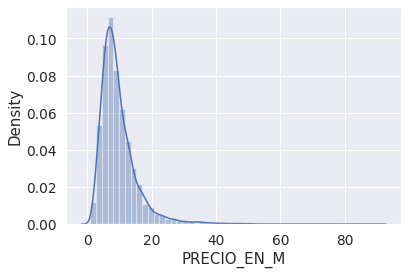

In [ ]:

sns.distplot(cars['PRECIO_EN_M'])
#skewness and kurtosis
print("Skewness: %f" % cars['PRECIO_EN_M'].skew())
print("Kurtosis: %f" % cars['PRECIO_EN_M'].kurt())

"""
We can observe that the distribution of prices shows a high positive skewness 
to the left (skew > 1). A kurtosis value of 60 is extremely high, meaning that
there is a profusion of outliers in the dataset. We need to do something.
"""

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


"\nWe see that the lesser is the mileage, the higher tends to be the price. \nPrice and Mileage seem to be in an exponential relationship with negative\nexponent. It's a typical form of exponential decay.\n"

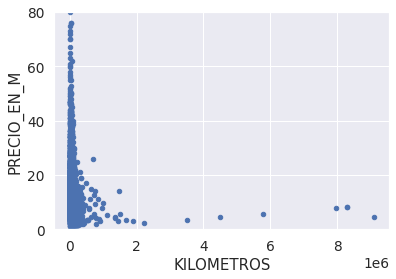

In [ ]:
# Scatter plot Mileage / Price
attrib = 'KILOMETROS'
data = pd.concat([cars['PRECIO_EN_M'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='PRECIO_EN_M', ylim=(0,80));

"""
We see that the lesser is the mileage, the higher tends to be the price. 
Price and Mileage seem to be in an exponential relationship with negative
exponent. It's a typical form of exponential decay.
"""

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'\nPrices tend to be higher as cars are more recent, and viceversa.\n'

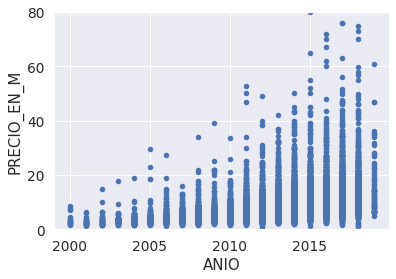

In [ ]:
# Scatter plot Year / Price
attrib = 'ANIO'
data = pd.concat([cars['PRECIO_EN_M'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='PRECIO_EN_M', ylim=(0,80));

"""
Prices tend to be higher as cars are more recent, and viceversa.
"""

'\nWe can observe there is a correlation between Price and Exotic/Luxury car manufacturers.\nOn a sidenote, there is a prevalence of low to medium budget cars in the dataset\n\nSeveral car manufacturers as Porsche, Audi, Chevreolet ecc.. have a strong \npresence of outliers, altought outliers may not be the right term because\nthose makers produce car models that cost more than others.\n'

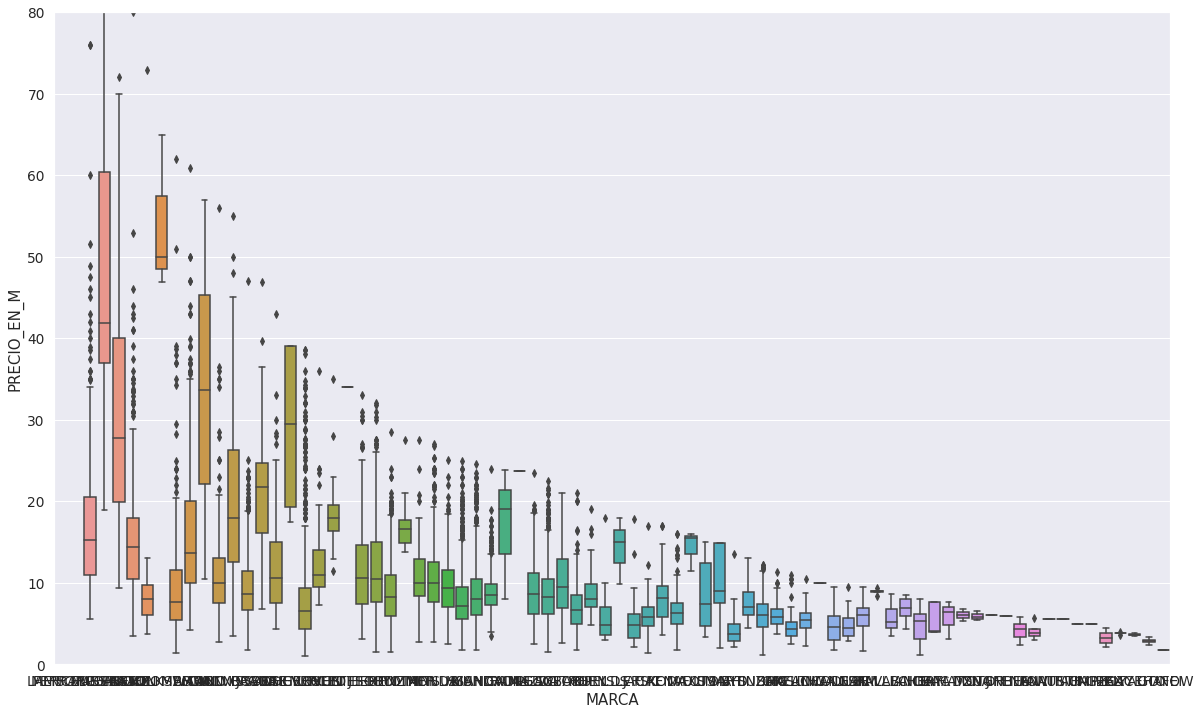

In [ ]:

attrib = 'MARCA'
data = pd.concat([cars['PRECIO_EN_M'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=attrib, y="PRECIO_EN_M", data=data)
fig.axis(ymin=0, ymax=80);

"""
We can observe there is a correlation between Price and Exotic/Luxury car manufacturers.
On a sidenote, there is a prevalence of low to medium budget cars in the dataset

Several car manufacturers as Porsche, Audi, Chevreolet ecc.. have a strong 
presence of outliers, altought outliers may not be the right term because
those makers produce car models that cost more than others.
"""

'\nWe can observe a slight increase of Prices the most recent years. Not a strong\ntendency though.\n'

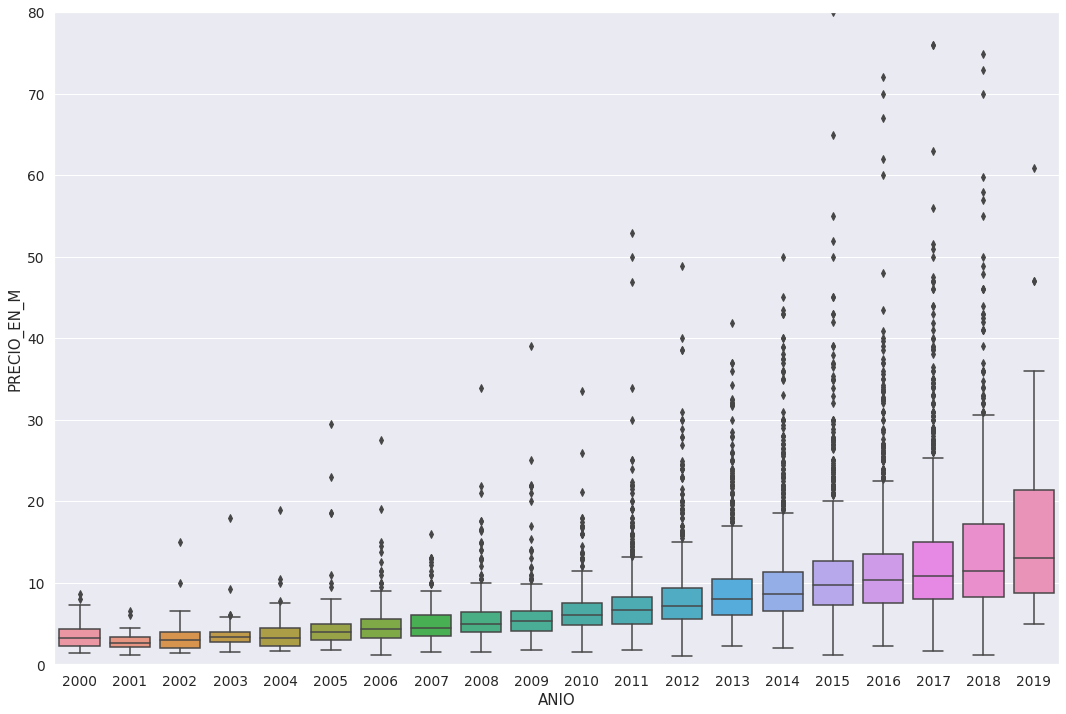

In [ ]:

# Box plot Year / Price

attrib = 'ANIO'
data = pd.concat([cars['PRECIO_EN_M'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=attrib, y="PRECIO_EN_M", data=data)
fig.axis(ymin=0, ymax=80);

"""
We can observe a slight increase of Prices the most recent years. Not a strong
tendency though.
"""

In [ ]:
# Find most important features relative to target Price
print("Find most important features relative to target")
corr = cars.corr()
corr.sort_values(["PRECIO_EN_M"], ascending = False, inplace = True)
print(corr.PRECIO_EN_M)

"""
Between Year and Price there is a positive correlation, meaning that the higher
is the Year (more recent), the higher is the Price (more recent cars cost more).
Between Price and Mileage there is a negative correlation, meaning that higher
is the mileage, lower is the Price (cars with high mileage cost less).

We obviously will get rid of Id attribute.
"""

Find most important features relative to target
PRECIO_EN_M    1.000000
ANIO           0.381018
KILOMETROS    -0.113427
Name: PRECIO_EN_M, dtype: float64


'\nBetween Year and Price there is a positive correlation, meaning that the higher\nis the Year (more recent), the higher is the Price (more recent cars cost more).\nBetween Price and Mileage there is a negative correlation, meaning that higher\nis the mileage, lower is the Price (cars with high mileage cost less).\n\nWe obviously will get rid of Id attribute.\n'

'\nThere is a mild positive correlation between Year and Price and a mild\nnegative correlation between Year and Mileage (as we have already said).\nMoreover the is a strong negative correlation between Mileage and Year,\nmeaning that the older is the car, the higher will be its mileage.\nObviously there are exceptions but that is the general trend.\n'

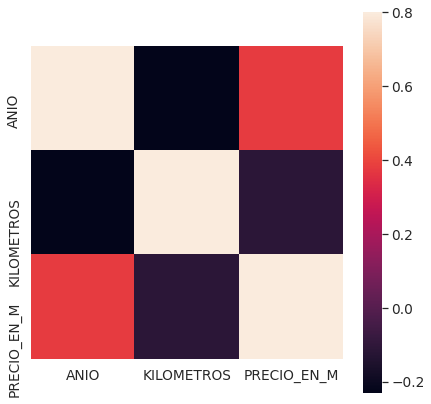

In [ ]:
# General correlation matrix
corrmat = cars.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

"""
There is a mild positive correlation between Year and Price and a mild
negative correlation between Year and Mileage (as we have already said).
Moreover the is a strong negative correlation between Mileage and Year,
meaning that the older is the car, the higher will be its mileage.
Obviously there are exceptions but that is the general trend.
"""

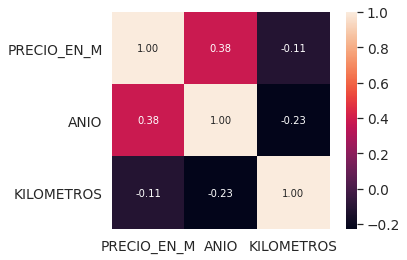

'\nThis plot shows what we said earies but in form of numbers.\n'

In [ ]:

# Price correlation matrix
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRECIO_EN_M')['PRECIO_EN_M'].index
cm = np.corrcoef(cars[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

"""
This plot shows what we said earies but in form of numbers.
"""

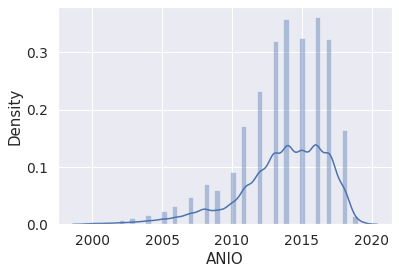

In [ ]:
# Record distribution over the year
sns.distplot((cars["ANIO"]))

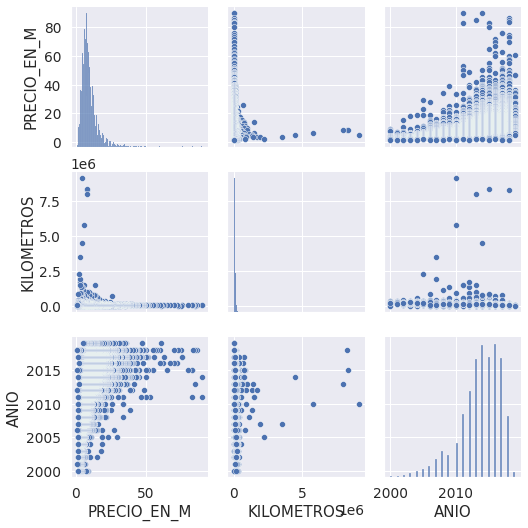

In [ ]:
# Scatter plot for numerical features
num_features = ["PRECIO_EN_M", "KILOMETROS", "ANIO"]
sns.pairplot(cars[num_features], size = 2.5)
plt.show();

In [ ]:
cars.isnull().sum()


ANIO           0
KILOMETROS     0
MARCA          0
PRECIO_EN_M    0
VERSION        0
dtype: int64

In [ ]:
# Checking for plausible values of numerical features -> we can see that the maximum value of mileage is 77milion km
# we need to fix these problems
cars.describe()

,ANIO,KILOMETROS,PRECIO_EN_M
count,15181.000000,1.518100e+04,15181.000000
mean,2013.664120,8.146116e+04,9.752072
std,3.198303,1.645406e+05,6.345000
min,2000.000000,2.000000e+00,1.000000
25%,2012.000000,4.000000e+04,6.000000
50%,2014.000000,6.800000e+04,8.300000
75%,2016.000000,1.015870e+05,11.800000
max,2019.000000,9.100085e+06,90.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


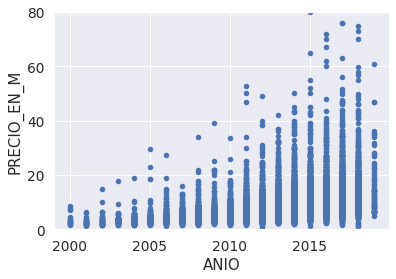

In [ ]:
attrib = 'ANIO'
data = pd.concat([cars['PRECIO_EN_M'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='PRECIO_EN_M', ylim=(0,80));

In [ ]:
cleaned_cars = pd.read_csv("/content/drive/My Drive/Data_Autos_OK.csv", encoding='utf-8', error_bad_lines=False,warn_bad_lines=False)


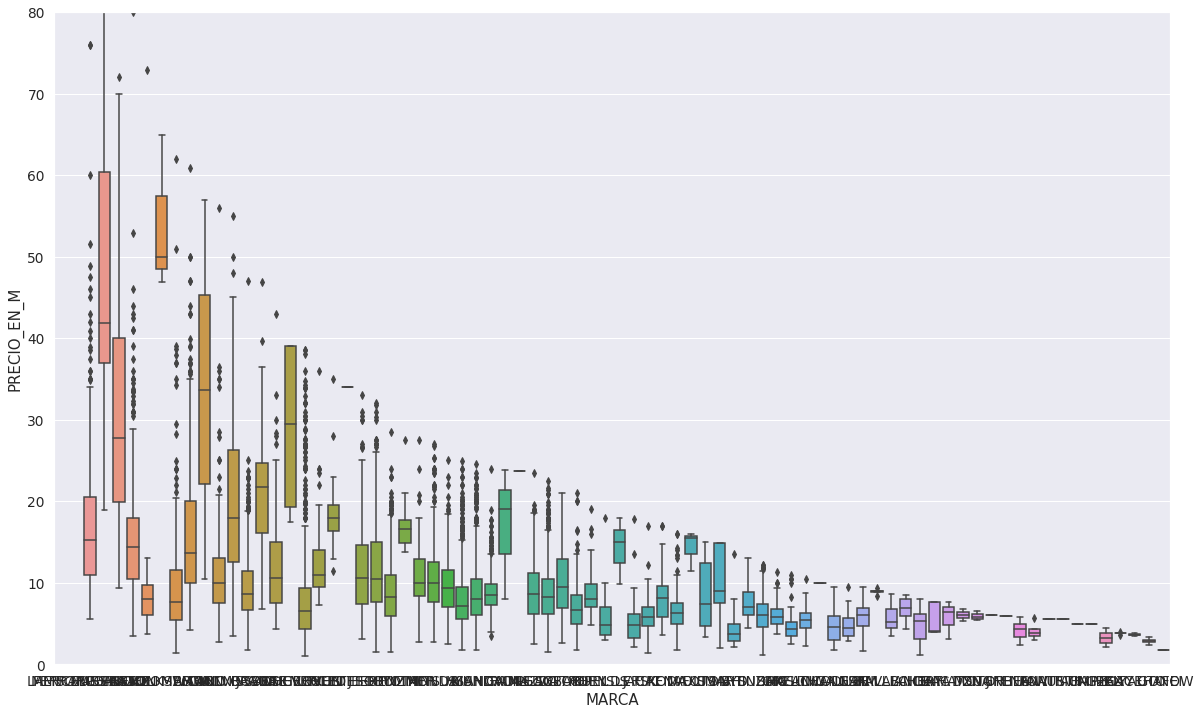

In [ ]:

# Box Plot showing car manufacturer / Price range after cleaning

attrib = 'MARCA'
data = pd.concat([cleaned_cars['PRECIO_EN_M'], cleaned_cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=attrib, y="PRECIO_EN_M", data=data)
fig.axis(ymin=0, ymax=80);

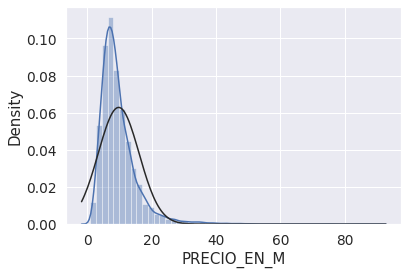

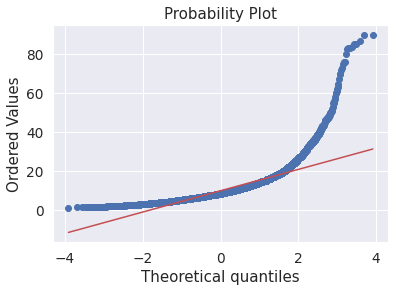

In [ ]:
# Distribution of prices
from scipy.stats import norm
from scipy import stats

# Using Histogram and normal probability plot
sns.distplot(cleaned_cars['PRECIO_EN_M'], fit=norm);
fig = plt.figure()
res = stats.probplot(cleaned_cars['PRECIO_EN_M'], plot=plt)

In [ ]:
# LABEL ENCODING
features = ['MARCA', 'VERSION']
les = {}

for f in features:
  les[f] = preprocessing.LabelEncoder()
  les[f] = les[f].fit(cleaned_cars[f])
  cleaned_cars[f] = les[f].transform(cleaned_cars[f])

In [ ]:
# Splitting the dataset into train and test sets
train_set, test_set = train_test_split(cleaned_cars, test_size = 0.33, random_state = 42)

"""
The Test Set in this case is our Hold-out set that we'll be using later
for final validation
"""

# Separating target labels from the rest
cars_train = train_set.drop("PRECIO_EN_M", axis=1) #train without target
cars_price_train = train_set["PRECIO_EN_M"].copy() #target

cars_test  = test_set.drop("PRECIO_EN_M", axis=1)
cars_price_test = test_set["PRECIO_EN_M"].copy()

In [ ]:
# This function returns the best score achieved by the model over all the cv splits
def best_score(forest, cv):
  best_score = 0
  for i in range(0, cv):
    items = list(map(lambda x: abs(x), forest.cv_results_['split'+str(i)+'_test_score']))
    arr = np.append(best_score, items)
    best_score = max(arr)
  
  return best_score

In [ ]:
# This functions returns the best combination of parameters, which allows to
# get the best score
def best_params(forest):
  return forest.cv_results_['params'][forest.cv_results_['rank_test_score'][0]-1]

In [ ]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [ ]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

import os

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet

class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.feature_names].values

In [ ]:
# Setting categorical and numerical attributes
cat_features = ["MARCA", "VERSION"]
num_features = list(cars_train.drop(cat_features, axis=1))

# Building the Pipelines for categorical and numerical dataframes
numerical_pipeline = Pipeline([
    ("selector", DFSelector(num_features)),
    ("std_scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("selector", DFSelector(cat_features)),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown = "ignore"))
])

# full_pipeline
full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", numerical_pipeline),
    ("cat_pipeline", categorical_pipeline)
])

In [ ]:
# Apply the full pipeline
ohe_cars_train = full_pipeline.fit_transform(cars_train) # train set

In [ ]:
lin_reg_model = LinearRegression()
%time lin_reg_model.fit(ohe_cars_train, cars_price_train)

CPU times: user 414 ms, sys: 291 ms, total: 706 ms
Wall time: 365 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# LinearRegression score for price prediction
ohe_cars_test = full_pipeline.transform(cars_test)

print("Best Linear Regression parameters:")
print(ohe_cars_test)
print("\nLinear Regressor score without CV on train set: %.3f" % lin_reg_model.score(ohe_cars_train, cars_price_train)) #score on train set
print("Linear Regression score without CV on test set: %.3f" % lin_reg_model.score(ohe_cars_test, cars_price_test)) # score on test set
#print("Linear Regression Best score with CV=3: %.3f" % best_score(lin_reg, 3)) # -> best score on test set is high

Best Linear Regression parameters:
  (0, 0)	0.4146280387707883
  (0, 1)	-0.27983275442227307
  (0, 67)	1.0
  (0, 514)	1.0
  (1, 0)	0.7262501316058835
  (1, 1)	-0.2106521026764793
  (1, 50)	1.0
  (1, 108)	1.0
  (2, 0)	0.10300594593569319
  (2, 1)	0.4465640889085616
  (2, 24)	1.0
  (2, 506)	1.0
  (3, 0)	0.10300594593569319
  (3, 1)	0.2597763291949184
  (3, 35)	1.0
  (3, 358)	1.0
  (4, 0)	1.3494943172760736
  (4, 1)	-0.5288831007071306
  (4, 53)	1.0
  (4, 554)	1.0
  (5, 0)	0.4146280387707883
  (5, 1)	-0.3317182432316184
  (5, 57)	1.0
  (5, 296)	1.0
  (6, 0)	-1.1434824254046874
  :	:
  (5003, 719)	1.0
  (5004, 0)	1.0378722244409786
  (5004, 1)	-0.2918355975001683
  (5004, 41)	1.0
  (5004, 666)	1.0
  (5005, 0)	0.4146280387707883
  (5005, 1)	-0.23832436337479682
  (5005, 23)	1.0
  (5005, 405)	1.0
  (5006, 0)	-0.8318603325695922
  (5006, 1)	0.05223437395753706
  (5006, 51)	1.0
  (5006, 347)	1.0
  (5007, 0)	-0.5202382397344971
  (5007, 1)	0.1629234167508071
  (5007, 63)	1.0
  (5007, 549)	1.0
 

In [ ]:
# Prediction on whole training set
from sklearn.metrics import mean_squared_error

price_predictions_train = lin_reg_model.predict(ohe_cars_train) #using the whole training set for making prediction with the final model given by the best CV parameters

# Reversing np.log operation
price_predictions_train_normal = np.exp(price_predictions_train)
cars_price_train_normal = np.exp(cars_price_train)

# MSE between target values (i.e known) and predicted values
lin_mse = mean_squared_error(cars_price_train_normal, price_predictions_train_normal)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.472711853742414e+35

In [ ]:
print(price_predictions_train_normal[580:590])
print('\n')
print(list(cars_price_train_normal[580:590]))

[1.06043476e+04 2.93384608e+02 1.96701219e+02 3.99386771e+03
 3.18542621e+05 7.64478103e+03 3.89009883e+03 2.14098798e+03
 9.44519753e+04 1.98447427e+04]


[5431.659591362978, 109.94717245212352, 365.0374678653289, 665.1416330443618, 1998.1958951041172, 12088.380730216988, 8103.083927575384, 2208.347991887209, 442413.3920089205, 1096.6331584284585]


In [ ]:
# Prediction on test set
price_predictions_test = lin_reg_model.predict(ohe_cars_test)

# Reversing np.log operation
price_predictions_test_normal = np.exp(price_predictions_test)
cars_price_test_normal = np.exp(cars_price_test)

final_mse = mean_squared_error(cars_price_test_normal, price_predictions_test_normal)
final_rmse = np.sqrt(final_mse)

final_rmse

1.724227289623592e+37

In [ ]:
print(price_predictions_test_normal[:]) #predictions on test set
print('\n')
print(list(cars_price_test_normal[:])) #known values in test set

[9.20433649e+03 2.02203047e+04 1.30360994e+05 ... 1.27489769e+02
 5.03973612e+00 7.04318406e+03]


[2697.28232826851, 3640.950307332352, 729416.3698477013, 33.11545195869231, 1096.6331584284585, 403.4287934927351, 984609.1112290357, 1480.299927584545, 36.59823444367799, 1096.6331584284585, 5389698.476283012, 40.4473043600674, 268337.2865208745, 1096.6331584284585, 8103.083927575384, 66.68633104092515, 268337.2865208745, 24154952.7535753, 10938.019208165191, 270.42640742615254, 1808.0424144560632, 2980.9579870417283, 6582992.584583731, 4914.768840299134, 24154952.7535753, 5389698.476283012, 8103.083927575384, 2676445.0551890987, 4023.872393822313, 7331.973539155995, 1339.430764394418, 1480.299927584545, 66.68633104092515, 33.11545195869231, 403.4287934927351, 7331.973539155995, 13359.726829661873, 244.69193226422038, 99.48431564193378, 984609.1112290357, 60.34028759736195, 403.4287934927351, 1480.299927584545, 90.01713130052181, 181.27224187515122, 11.023176380641601, 44.701184493300815

In [ ]:
from sklearn.metrics import r2_score
r2_score(cars_price_test_normal, price_predictions_test_normal, multioutput='variance_weighted')

-0.0002026635986267511

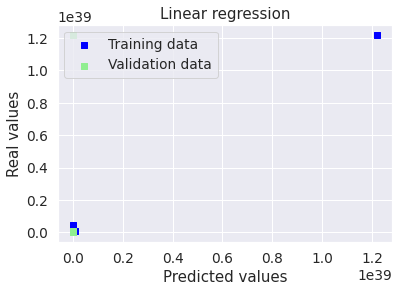

In [ ]:
# Plot predictions
plt.scatter(price_predictions_train_normal, np.exp(cars_price_train), c = "blue", marker = "s", label = "Training data")
plt.scatter(price_predictions_test_normal, np.exp(cars_price_test), c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 0.42], [0, 0.42], c = "red")



plt.show()


## Random Forest - Prueba Final

In [14]:
# Montar Google Drive - Problemas con shared, asi que lo deje en el home
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df_transactions = pd.read_csv('/content/drive/My Drive/Data_Autos_OK.csv', encoding = 'utf-8', dtype = str)

df_transactions.sample(5)
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Set numerical type to specific columns
df_transactions[['ANIO', 'KILOMETROS', 'PRECIO_EN_M']] = df_transactions[['ANIO', 'KILOMETROS', 'PRECIO_EN_M']].apply(pd.to_numeric, errors='coerce')
# Remove null values
df_transactions = df_transactions.dropna()
df_transactions[['ANIO', 'KILOMETROS', 'PRECIO_EN_M']] = df_transactions[['ANIO', 'KILOMETROS', 'PRECIO_EN_M']].astype(int)

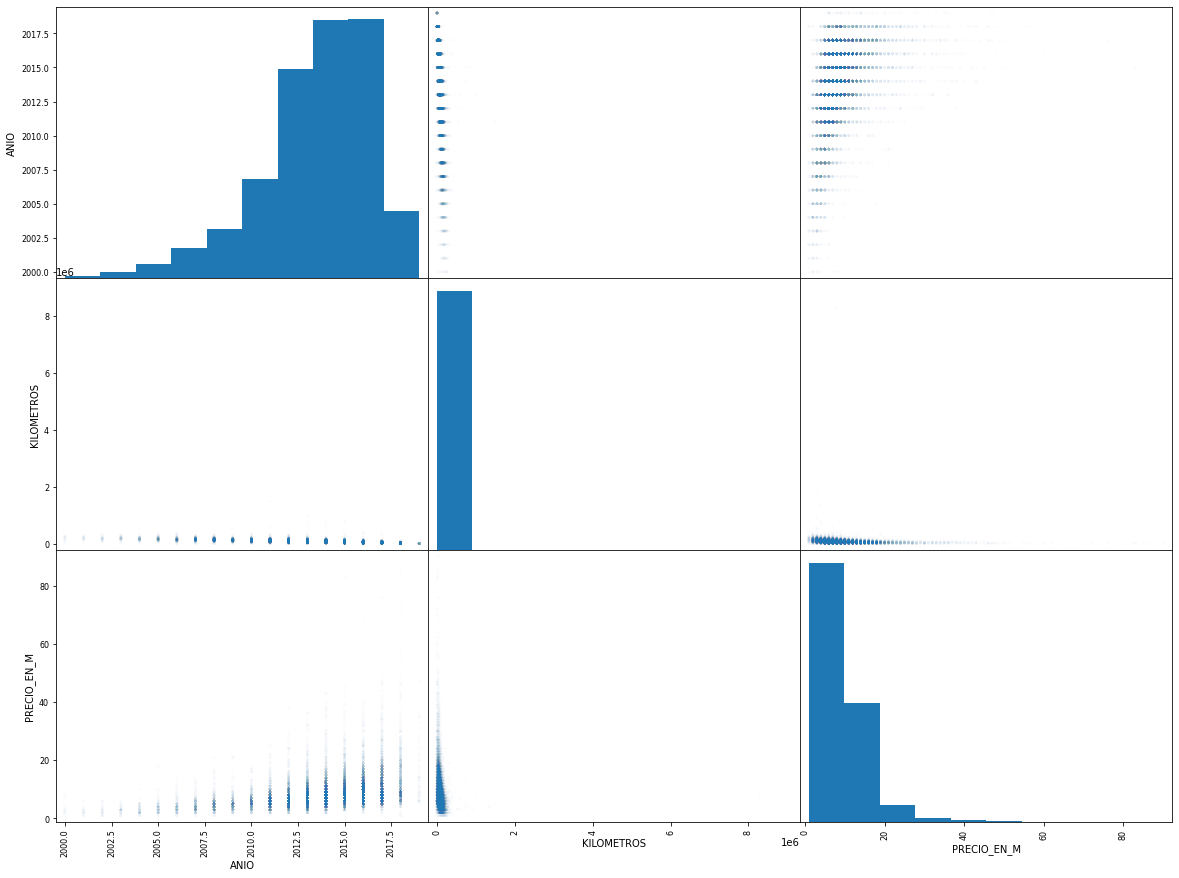

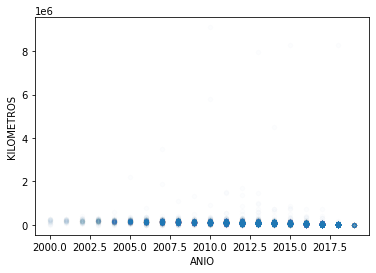

In [16]:
# Pearson correlation coefficient between each pair of attributes
df_transactions.corr()
# Plot every numerical attribute against every other
pd.plotting.scatter_matrix(df_transactions, figsize =(20,15), alpha = 0.01)
# Visualize correlation between the attribute ‘Floor area’ and the target ‘Key money’
df_transactions.plot.scatter('ANIO', 'KILOMETROS', alpha = 0.01)

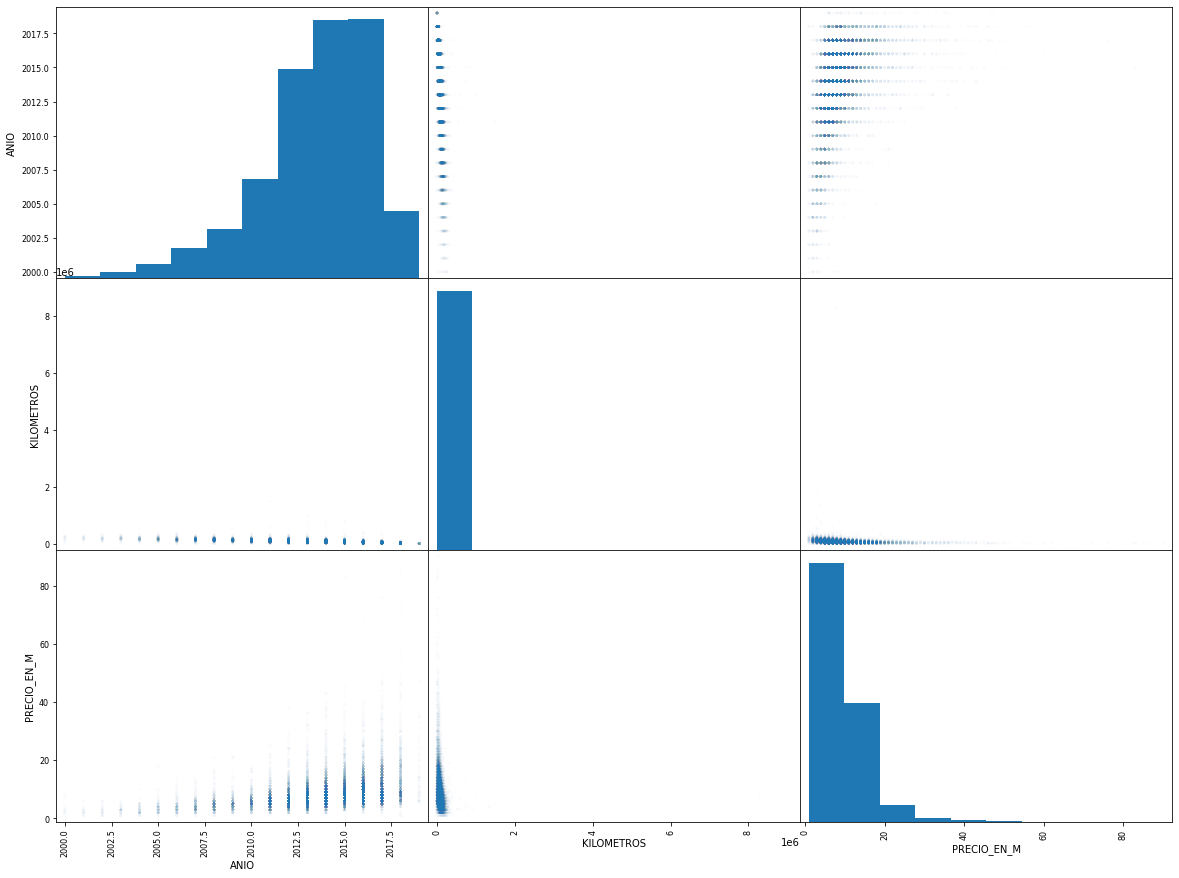

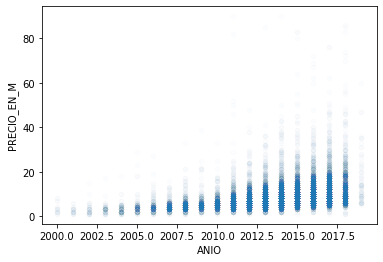

In [17]:
# Pearson correlation coefficient between each pair of attributes
df_transactions.corr()
# Plot every numerical attribute against every other
pd.plotting.scatter_matrix(df_transactions, figsize =(20,15), alpha = 0.01)
# Visualize correlation between the attribute ‘Floor area’ and the target ‘Key money’
df_transactions.plot.scatter('ANIO', 'PRECIO_EN_M', alpha = 0.01)

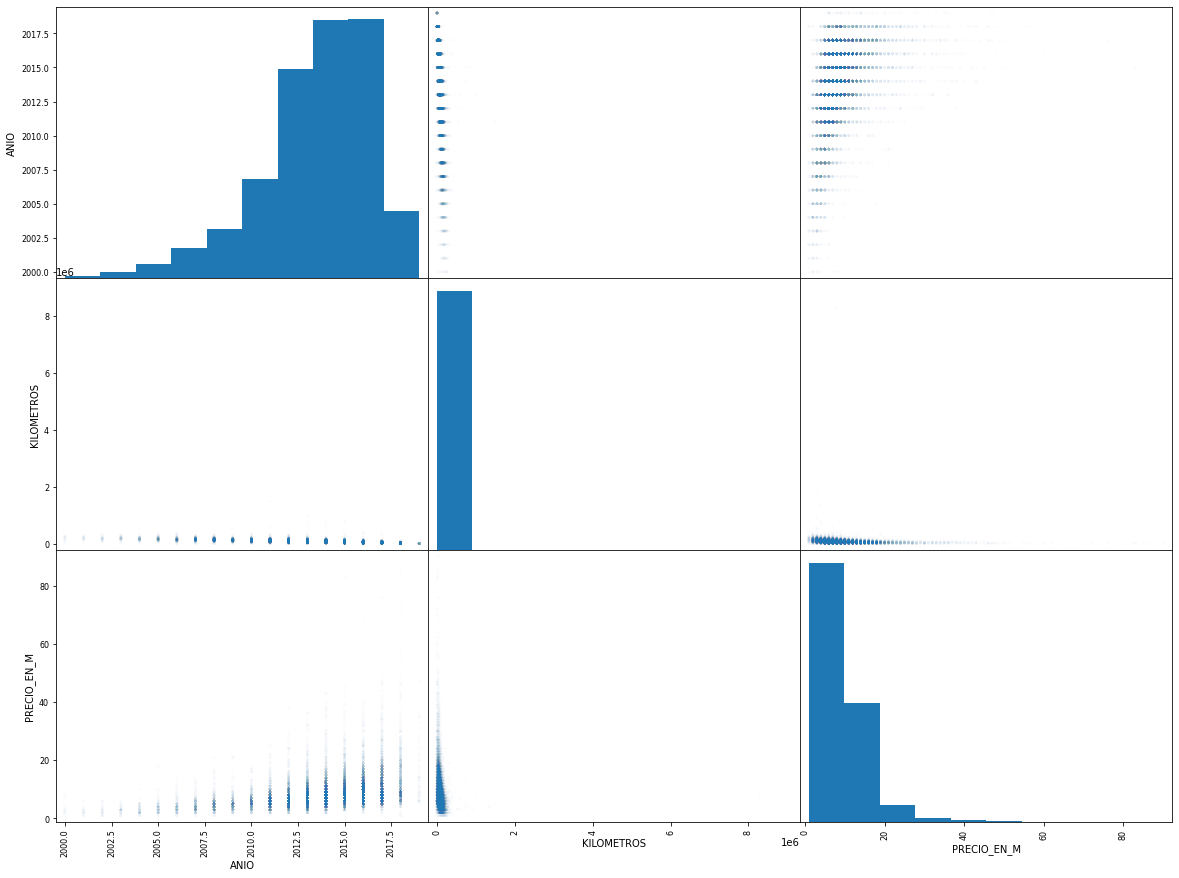

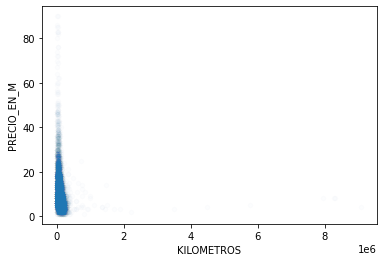

In [18]:
# Pearson correlation coefficient between each pair of attributes
df_transactions.corr()
# Plot every numerical attribute against every other
pd.plotting.scatter_matrix(df_transactions, figsize =(20,15), alpha = 0.01)
# Visualize correlation between the attribute ‘Floor area’ and the target ‘Key money’
df_transactions.plot.scatter('KILOMETROS', 'PRECIO_EN_M', alpha = 0.01)

In [19]:
# 1.5*IQR rule: function to compute the lower range and upper range
def range_keep(column):
   sorted(column)
   Q1,Q3 = np.percentile(column , [25,75]) # 25th to 75th percentile
   IQR = Q3 - Q1
   lower_range = Q1 - (1.5 * IQR)
   upper_range = Q3 + (1.5 * IQR)
   return lower_range, upper_range
# Compute the lower range and upper range for column 'Key money'
lower_range, upper_range = range_keep(df_transactions['PRECIO_EN_M'])
# Keep only values that lie between that range
df_transactions =  df_transactions.drop(df_transactions[ (df_transactions['PRECIO_EN_M'] > upper_range) |
(df_transactions['PRECIO_EN_M'] < lower_range)].index)
# Compute the lower range and upper range for column 'Floor area'
lower_range, upper_range = range_keep(df_transactions['ANIO'])
# Keep only values that lie between that range
df_transactions = df_transactions.drop(df_transactions[ (df_transactions['ANIO'] > upper_range) | (df_transactions['ANIO'] < lower_range)].index)

In [23]:
# Automatically generate dummy variables from column 'District name'
dummy_district = pd.get_dummies(df_transactions['MARCA'])
dummy_district = pd.get_dummies(df_transactions['VERSION'])
# Concatenate the original dataframe with the dummy variables
df_transactions_dummy = pd.concat([df_transactions, dummy_district], axis = 1)
# Drop the original 'District name' column
df_transactions_dummy = df_transactions_dummy.drop(columns={'MARCA'}).reset_index(drop=True)
df_transactions_dummy = df_transactions_dummy.drop(columns={'VERSION'}).reset_index(drop=True)
df_transactions_dummy.sample(5)

,ANIO,KILOMETROS,PRECIO_EN_M,1.5,108,114,114I,116,118,118I,120,120 2.0 M SPORT 3P,120I,135,137,137 SPORT,14000,1500,156,159,180,2,2 SPORT,200,2008,206,207,"207 COMPACT, I10",208,218,220,230,250,3,3 CONFORT,3 SPORT,300,3008,301,307,...,VOLEEX C10,VOLEEX C20R,VOLEEX C30,VOLEEX C50,VOYAGE,WAY,WEEKEND,WINGLE,WINGLE 5,WINGLE 6,WR-V,WRANGLER,WRX,X-TRAIL,X1,X25,X3,X35,X5,X50,X55,X60,XC 60,XC 70,XC 90,XE,XENON,XF,XK,XL7,XLV,XSARA PICASSO,XUV 500,XV,YARIS,YETI,Z4,ZAFIRA,ZELAS,ZHONGYI
12133,2011,101000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12341,2010,138000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8572,2012,92400,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9509,2012,63500,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6159,2015,51000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
y = df_transactions_dummy['PRECIO_EN_M']
X = df_transactions_dummy.drop(columns={'PRECIO_EN_M'})

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [37]:
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [38]:
# Coefficient of determination (R^2) on the test set
tree_reg.score(X_test, y_test)

NameError: ignored

## random forest este si que si?


In [40]:
# Import libraries
import pandas as pd # for data analsysis
import numpy as np # to handle data in a vectorized manner
import seaborn as sns # for visualization
from sklearn.model_selection import RandomizedSearchCV # for hyperparameters tuning
from sklearn.model_selection import cross_val_score # for cross-validation evaluation
from sklearn.metrics import mean_squared_error # to calculate the RMSE
from joblib import dump # to save a model to disk

In [41]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df_transactions = pd.read_csv('/content/drive/My Drive/Data_Autos_OK.csv', encoding = 'utf-8', dtype = str)

df_transactions.sample(5)
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Scaler for X
scaler_x = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Model evaluation by cross-validation
lin_reg_score = cross_val_score(lin_reg, X_train_scaled, y_train, verbose = 2)

# Average Coefficient of determination (R^2) on the validation set
print(f'R^2 Validation: {lin_reg_score.mean()}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
R^2 Validation: -5.200892791521886e+24


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


In [45]:
# Fit the model to the training set
lin_reg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Compute predictions from the test set
y_pred = lin_reg.predict(X_test_scaled)

In [47]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {lin_reg.score(X_test_scaled, y_test)}')

R^2 Test: -7.664808968487071e+24


In [48]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 10231094528991.451


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


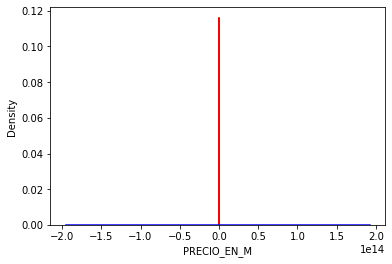

In [49]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("lin_reg.png")

#decision tree


In [55]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': np.arange(5, 41, 5), # Maximum number of levels in tree
               'min_samples_split': [5, 10, 20, 40], # Minimum number of samples required to split a node
               'min_samples_leaf': [2, 6, 12, 24], # Minimum number of samples required at each leaf node
               }

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate a RandomizedSearchCV on a DecisionTreeRegressor model with 100 iterations
tree_reg = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

tree_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid

In [57]:
tree_reg.best_params_
# Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {tree_reg.best_score_}')

R^2 Validation: 0.47784701717304


In [58]:
# Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, tree_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('ANIO', 0.33450851148022315),
 ('MORNING', 0.030112095773279522),
 ('EXPLORER', 0.028703558689500405),
 ('F-150', 0.021772280507959665),
 ('SPARK', 0.019804034755631198),
 ('SANTA FE', 0.01936240534017675),
 ('SAIL', 0.019307312710918748),
 ('GRAND CHEROKEE', 0.01899062632274754),
 ('Q5', 0.016503182876452006),
 ('WRANGLER', 0.016237092987749554),
 ('A6', 0.01422764497513934),
 ('PATHFINDER', 0.013569202352430245),
 ('SWIFT', 0.013563542788507849),
 ('4 RUNNER', 0.012398545307440577),
 ('A3', 0.01174007533573239),
 ('NP300', 0.011730828884666398),
 ('KILOMETROS', 0.011085304254517106),
 ('X5', 0.009760168194416998),
 ('Q3', 0.00947493314135291),
 ('320', 0.008991052927539796),
 ('A 200', 0.008631661407649982),
 ('OUTBACK', 0.00829708050408048),
 ('SORENTO', 0.008240916827355883),
 ('CAYENNE', 0.008107528933872009),
 ('ALTO', 0.008080361335612721),
 ('AMAROK', 0.00789608086378505),
 ('MARCH', 0.0078022358953120695),
 ('Q7', 0.007790650757483131),
 ('SILVERADO', 0.007303916900135281),


In [60]:
# Compute predictions from the test set
y_pred = tree_reg.predict(X_test)

In [61]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {tree_reg.score(X_test, y_test)}')

R^2 Test: 0.4871576955929636


In [62]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')


RMSE Test: 2.6464479156526752


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


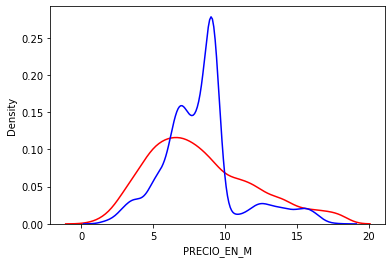

In [63]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("tree_reg.png")

# random forest!

In [64]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': np.arange(5, 41, 5), # Maximum number of levels in tree
               'min_samples_split': [5, 10, 20, 40], # Minimum number of samples required to split a node
               'min_samples_leaf': [2, 6, 12, 24], # Minimum number of samples required at each leaf node
               }

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomizedSearchCV on a RandomForestRegressor model with 100 iterations
rfor_reg = RandomizedSearchCV(RandomForestRegressor(), param_distributions = param_grid, n_iter = 30, verbose = 2, n_jobs = -1)

rfor_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 18.9min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [79]:
# Check the best parameters found by RandomizedSearchCV
rfor_reg.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 40}

In [80]:

# Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {rfor_reg.best_score_}')

R^2 Validation: 0.537834904774847


In [81]:
# Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, rfor_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('ANIO', 0.3344781988179662),
 ('EXPLORER', 0.029486891126176782),
 ('MORNING', 0.029053955612456363),
 ('SPARK', 0.02148620533138209),
 ('F-150', 0.020661935410908286),
 ('SAIL', 0.020290821312391214),
 ('SANTA FE', 0.01876829128578802),
 ('GRAND CHEROKEE', 0.017296969621901317),
 ('WRANGLER', 0.016345501209239804),
 ('KILOMETROS', 0.015410738306790522),
 ('Q5', 0.015237427060980108),
 ('A6', 0.014131989148749465),
 ('PATHFINDER', 0.013256220868237568),
 ('SWIFT', 0.012690435738360411),
 ('NP300', 0.012374687665515154),
 ('A3', 0.011824368651275868),
 ('4 RUNNER', 0.011192394130845723),
 ('ACCENT', 0.010846738759435407),
 ('A 200', 0.009986679769356074),
 ('Q3', 0.009364754849743804),
 ('SORENTO', 0.009225696094024762),
 ('X5', 0.00874033173516632),
 ('MARCH', 0.008615171001583712),
 ('ALTO', 0.008587697369085686),
 ('OUTBACK', 0.007983315853076245),
 ('320', 0.007882295098667837),
 ('CELERIO', 0.007881404035670088),
 ('CAYENNE', 0.007432494418281226),
 ('A4', 0.007398265571028179),


In [82]:
# Compute predictions from the test set
y_pred = rfor_reg.predict(X_test)

In [83]:

# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {rfor_reg.score(X_test, y_test)}')

R^2 Test: 0.5423188279901917


In [84]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')


RMSE Test: 2.5000745150990347


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


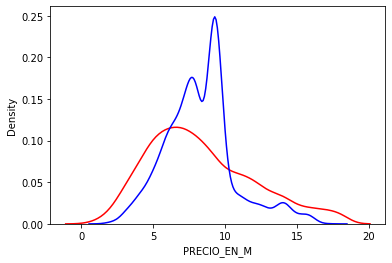

In [86]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("rfor_reg.png")